<a href="https://colab.research.google.com/github/angeloobeta/OutReachy_FireFox_IntialContribution/blob/main/Initial_contribution_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table of Content**
---
### **[Initial Contribution](https://colab.research.google.com/drive/1Wlj9SlUUp9QZvyWzYnxjSiom2g-mwa3W#scrollTo=ROG0GkBRHPJp&line=1&uniqifier=1)**

 > **[1.0 Inspecting the Dataset](https://colab.research.google.com/drive/1Wlj9SlUUp9QZvyWzYnxjSiom2g-mwa3W#scrollTo=U7Utk6qLHPJ5)**

 > **[2.0 Data Cleaning](https://colab.research.google.com/drive/1Wlj9SlUUp9QZvyWzYnxjSiom2g-mwa3W#scrollTo=OqQcU9KQShoL)** 

 > **[3.0 Exploratory Data Analysis](https://colab.research.google.com/drive/1Wlj9SlUUp9QZvyWzYnxjSiom2g-mwa3W#scrollTo=H-7hQJXha-IR) (EDA)**

## **[2nd Contribution](https://colab.research.google.com/drive/1Wlj9SlUUp9QZvyWzYnxjSiom2g-mwa3W#scrollTo=_bpMtbmekFsZ)**



# **Initial Contribution**
### **Tasks**
* Load the data into _R_ or _Python_
  - Notebooks (e.g. Jupyter)  make us smile, but scripts work too.
* Perform exploratory data analysis.
  - Be verbose as to what you are looking at and why.
  - Keep in mind the primary task below.
* Perform data cleaning, if necessary.
  - Again, explain your methodology and  reasoning behind it.
* **Primary Task** - Answer the following questions:  
   - Which single field in `dataset.csv` best describes the `SalePrice` field?
   - Why did you choose this field? Please thoroughly explain your reasoning. 	

### Import the necessary python dependencies


In [ ]:
import os, gc, warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/gdrive' )
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import  numpy as np
import pandas as pd
from pandas import Series, DataFrame
import random
import seaborn as sns
from scipy import stats
from scipy.stats import norm
%matplotlib inline
sns.set_style('whitegrid')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **1.0 Inspecting the Dataset**  
<font size='4'>  
&nbsp; &nbsp; EDA and data cleaning is the foundation on which a good visualization is built.
</font>
<br>

In [ ]:
# Show all data columns
pd.set_option("display.max_column", 100)
#  Load the dataset
data_original = pd.read_csv('/content/gdrive/MyDrive/outreachy dataset/dataset.csv')
# make a copy of dataset
df = data_original.copy()

In [ ]:
# Print the head of the dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1460, 81)

In [ ]:
# Since the number of columns is much, it would be  nice to view a list of all the columns
coln = list(df.columns)[1::]
for a,b,c,d,e,f,g,h in zip(coln[0:11],coln[10:21],coln[20:31],coln[30:41],coln[40:51],coln[50:61],coln[60:71],coln[70:81]):
    print ('{:14}{:14}{:14}{:14}{:14}{:14}{:14}{}'.format(a,b,c,d,e,f,g,h))

MSSubClass    LandSlope     RoofStyle     BsmtCond      CentralAir    BedroomAbvGr  GarageCars    PoolArea
MSZoning      Neighborhood  RoofMatl      BsmtExposure  Electrical    KitchenAbvGr  GarageArea    PoolQC
LotFrontage   Condition1    Exterior1st   BsmtFinType1  1stFlrSF      KitchenQual   GarageQual    Fence
LotArea       Condition2    Exterior2nd   BsmtFinSF1    2ndFlrSF      TotRmsAbvGrd  GarageCond    MiscFeature
Street        BldgType      MasVnrType    BsmtFinType2  LowQualFinSF  Functional    PavedDrive    MiscVal
Alley         HouseStyle    MasVnrArea    BsmtFinSF2    GrLivArea     Fireplaces    WoodDeckSF    MoSold
LotShape      OverallQual   ExterQual     BsmtUnfSF     BsmtFullBath  FireplaceQu   OpenPorchSF   YrSold
LandContour   OverallCond   ExterCond     TotalBsmtSF   BsmtHalfBath  GarageType    EnclosedPorch SaleType
Utilities     YearBuilt     Foundation    Heating       FullBath      GarageYrBlt   3SsnPorch     SaleCondition
LotConfig     YearRemodAdd  BsmtQual   

In [ ]:
#  Data type for each column
data_type = df.dtypes.reset_index().T
data_type

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,int64,int64,object,float64,int64,object,object,object,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,object,object,object,object,float64,object,object,object,object,object,object,object,int64,object,int64,int64,int64,object,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,int64,object,int64,object,object,float64,object,int64,int64,object,object,object,int64,int64,int64,int64,int64,int64,object,object,object,int64,int64,int64,object,object,int64


### Total 80 features from the dataset can be classified into nominal, ordinal, and numeric variables
Nominal features: Id (primary key), MSSubClass, MSZoning, Street, Alley, LandContour, LotConfig, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, Heating, CentralAir, GarageType, MiscFeature, SaleType, SaleCondition

Ordinal features: LotShape, Utilities, LandSlope, OverallQual, OverallCond, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, Electrical, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence

Discrete numeric features: YearBuilt, YearRemodAdd, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, MoSold, YrSold

        MSSubClass  values:  [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
        OverallQual  values:  [ 7  6  8  5  9  4 10  3  1  2]
        OverallCond  values:  [5 8 6 7 4 2 3 9 1]
        PoolArea  values:  [  0 512 648 576 519 738]

Continuous numeric features: LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, SalePrice

### **Summary of the categorical and numerical features**

In [ ]:
#separate variables into new data frames
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])
print("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],categorical_data.shape[1]))

There are 38 numeric and 43 categorical columns in train data


In [ ]:
# Discription of the categorical features
def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: x.unique())
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    ratio_missing = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    # print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['Counts', 'Distincts', 'nulls', 'Ratio_missing ', 'Uniques']
        str = pd.concat([counts, distincts, nulls, ratio_missing, uniques], axis = 1)

    else:
        corr = df.corr()[pred]
        str = pd.concat([counts, distincts, nulls, ratio_missing, uniques, corr], axis = 1, sort=False)
        corr_col = 'corr '  + pred
        cols = ['Counts', 'Distincts', 'nulls', 'Ratio_missing', 'Uniques', corr_col ]
    
    str.columns = cols
    dtypes = str.dtypes.value_counts()
    # print('___________________________\nData types:\n',str.types.value_counts())
    # print('___________________________')
    return str
rstr(categorical_data)

,Counts,Distincts,nulls,Ratio_missing,Uniques
MSZoning,1460,5,0,0.000000,"[RL, RM, C (all), FV, RH]"
Street,1460,2,0,0.000000,"[Pave, Grvl]"
Alley,91,3,1369,93.767123,"[nan, Grvl, Pave]"
LotShape,1460,4,0,0.000000,"[Reg, IR1, IR2, IR3]"
LandContour,1460,4,0,0.000000,"[Lvl, Bnk, Low, HLS]"
Utilities,1460,2,0,0.000000,"[AllPub, NoSeWa]"
LotConfig,1460,5,0,0.000000,"[Inside, FR2, Corner, CulDSac, FR3]"
LandSlope,1460,3,0,0.000000,"[Gtl, Mod, Sev]"
Neighborhood,1460,25,0,0.000000,"[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ..."
Condition1,1460,9,0,0.000000,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ..."


In [ ]:
#  Discription of the numerical features
def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: x.unique().sum())
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    ratio_missing = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    # print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['Counts', 'Distincts', 'nulls', 'Ratio_missing', 'Uniques', 'Skewness', 'Kurtosis']
        str = pd.concat([counts, distincts, nulls, ratio_missing, uniques, skewness, kurtosis], axis = 1)

    else:
        corr = df.corr()[pred]
        str = pd.concat([counts, distincts, nulls, ratio_missing, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
        corr_col = 'corr '  + pred
        cols = ['Counts', 'Distincts', 'nulls', 'Ratio_missing', 'Uniques', 'Skewness', 'Kurtosis', corr_col ]
    
    str.columns = cols
    # dtypes = str.dtypes.value_counts()
    # print('___________________________\nData types:\n',str.types.value_counts())
    # print('___________________________')
    return str
rstr(numeric_data, "SalePrice")

,Counts,Distincts,nulls,Ratio_missing,Uniques,Skewness,Kurtosis,corr SalePrice
Id,1460,1460,0,0.000000,1066530.0,0.000000,-1.200000,-0.021917
MSSubClass,1460,15,0,0.000000,1295.0,1.407657,1.580188,-0.084284
LotFrontage,1201,111,259,17.739726,NaN,2.163569,17.452867,0.351799
LotArea,1460,1073,0,0.000000,12156992.0,12.207688,203.243271,0.263843
OverallQual,1460,10,0,0.000000,55.0,0.216944,0.096293,0.790982
OverallCond,1460,9,0,0.000000,45.0,0.693067,1.106413,-0.077856
YearBuilt,1460,112,0,0.000000,218630.0,-0.613461,-0.439552,0.522897
YearRemodAdd,1460,61,0,0.000000,120780.0,-0.503562,-1.272245,0.507101
MasVnrArea,1452,328,8,0.547945,NaN,2.669084,10.082417,0.477493
BsmtFinSF1,1460,637,0,0.000000,446807.0,1.685503,11.118236,0.386420


### ============================================================================

## **2.0 Data Cleaning**
### In this section, we will perform some Data Cleaning and Data Pre-Processing.
In this stage, we'll deal with outlier values, encode variables, impute missing values, and take every possible initiative which can remove inconsistencies from the data set.

**Missing values**

Let's see which columns have missing values and their percentage.

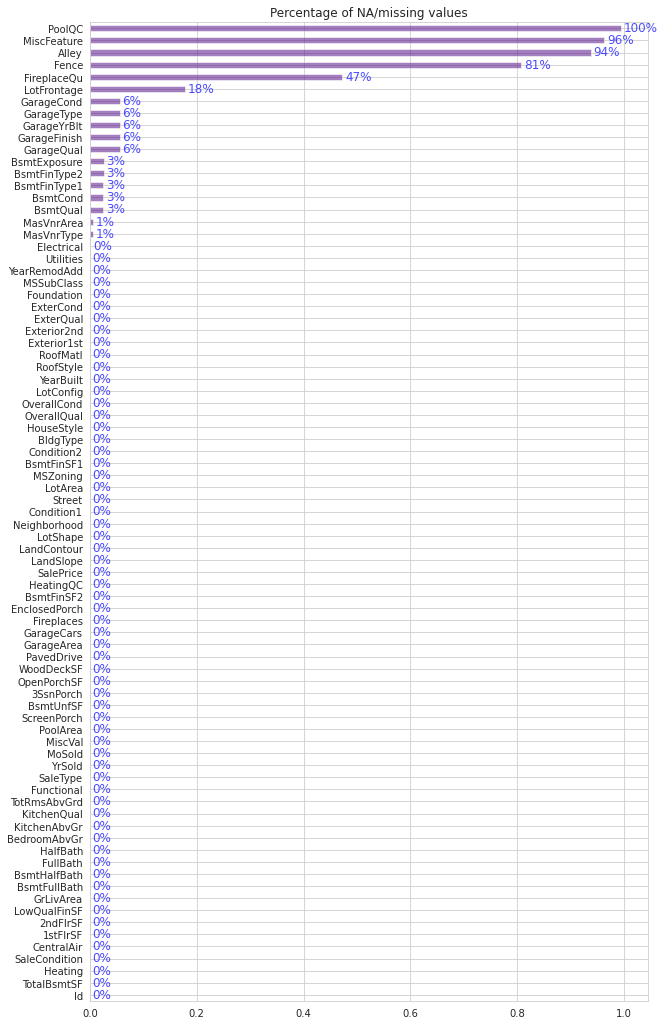

In [ ]:
### Checking for missing/NA values via visualization
ax = df.isna().sum().transform(lambda x:x/df.shape[0]).sort_values().plot.barh(
    figsize=(10,18), title='Percentage of NA/missing values', color='indigo', alpha=0.5)
for i in ax.patches:
    ax.text(i.get_width()+0.005, i.get_y(), str(int(round(i.get_width(),2)*100))+'%', fontsize=12, color='b', alpha=0.7);

 <pre>
The NA values in this data are quite massive. From the above plot we can observer that PoolQC has the highest "NA" value 
(more than 90% of the records)  followed by MscFeature 96%, Alley 94%, Fence 81% etc. NA values in several columns simply 
means that the property doesn't have the mentioned attribute: 
NA value in Alley → the property has no alley access, 
NA value in PoolQC → the property has no pool and so on...
We can simply replace the NA values in several columns by new categorical value 'None'. These columns are: Alley, BsmtQual, 
BsmtCond,BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond,
PoolQC, Fence, MiscFeature.

Exception:
One house has unfinished basement (which means it has a basement) but NA value of exposure (which means it has no 
basement) → contradictive; we will deal with that later. One house has NA value in BsmtFinType2 (which means it has 
no basement) but other features show that it has a basement → contradictive, deal with that later. GarageYrBlt is 
actually a numerical feature, but it has NA values (which means no garage), so it must be filled with numerical 
values too → deal with that later.
</pre>

In [ ]:
#filtering only the columns with at least 1 missing value
columns_with_miss = df.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss>0]
#The number of columns with missing values
print('Columns with missing values:', len(columns_with_miss))
#sorting the columns by the number of missing values descending
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 19


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

##### I noticed that variables related to "Garage" (GarageQual, GarageCond, GarageFinish, GarageYrBlt) has 81 missing values. A close observation also shows that the numeric feature "GarageCars" has zeros for rows where other "Garage' variables are "NaN". "NaN" could mean that the house doesn't have a Garage, it could also mean that there was an error when collecting the dataset; To be clear on that, let's explore it with respect to other variables like "HouseStyle", "Foundation", "Neighborhood", "LotShape" and "MSSubClass".

In [ ]:
df[df["GarageCond"].isnull()][["GarageQual", "GarageFinish","GarageCars","HouseStyle","BsmtCond", "BsmtQual"]].head()

,GarageQual,GarageFinish,GarageCars,HouseStyle,BsmtCond,BsmtQual
39,NaN,NaN,0,1Story,NaN,NaN
48,NaN,NaN,0,2Story,TA,TA
78,NaN,NaN,0,1Story,TA,TA
88,NaN,NaN,0,1.5Fin,Fa,TA
89,NaN,NaN,0,1Story,TA,Gd


In [ ]:
df[df["GarageYrBlt"].isnull()][["GarageQual","GarageType","GarageCars","HouseStyle","Neighborhood", "Foundation"]].head()

,GarageQual,GarageType,GarageCars,HouseStyle,Neighborhood,Foundation
39,NaN,NaN,0,1Story,Edwards,PConc
48,NaN,NaN,0,2Story,OldTown,BrkTil
78,NaN,NaN,0,1Story,Sawyer,CBlock
88,NaN,NaN,0,1.5Fin,IDOTRR,CBlock
89,NaN,NaN,0,1Story,CollgCr,PConc


In [ ]:
cols = ['Alley', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
df[cols] = df[cols].fillna('None')

### **Confusion about the basement**

In [ ]:
# One house has unfinished basement (which means it has a basement) but NA value of exposure (which means it has no basement).
df[(df['BsmtExposure'].isna()) & (df['TotalBsmtSF']>0)].iloc[:,30:40]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating
948,Gd,TA,NaN,Unf,0,Unf,0,936,936,GasA


In [ ]:
# One house has NA value in BsmtFinType2 (which means it has no basement) but other features show that it has a basement.

df[(df['BsmtFinType2'].isna()) & (df['TotalBsmtSF']>0)].iloc[:,30:40]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating
332,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA


#### **Solution based on naive assumption:**

##### There was a typo when inputing NA value in the feature BsmtExposure → replace with 'No' (no basement exposure).
##### There was a typo when inputing NA value in BsmtFinType2 → replace with 'Unf' (basement unfinished).

In [ ]:
df.loc[(df['BsmtExposure'].isna()) & (df['TotalBsmtSF']>0),'BsmtExposure'] = 'No'
df.loc[(df['BsmtFinType2'].isna()) & (df['TotalBsmtSF']>0),'BsmtFinType2'] = 'Unf'
cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df[cols] = df[cols].fillna('None')

FireplaceQu has 690 missing values, which is also pretty high. In this case, the missing values have meaning, which is "NO Fireplace". Fireplace has the following categories:

Ex Excellent - Exceptional Masonry Fireplace, Gd Good - Masonry Fireplace in main level, TA Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement, Fa Fair - Prefabricated Fireplace in basement, Po Poor - Ben Franklin Stove, NA No Fireplace Let's check the correlation between FireplaceQu and SalePrice, to see how important this feature is in order to determine the price

In [ ]:
# Replace the missing values for None.
df['FireplaceQu'].fillna('None', inplace=True)
# df['FireplaceQu'] = df.replace({'None':0,'Po': 1, 'Fa': 2, \
# 'TA': 3, 'Gd': 4, 'Ex': 5})

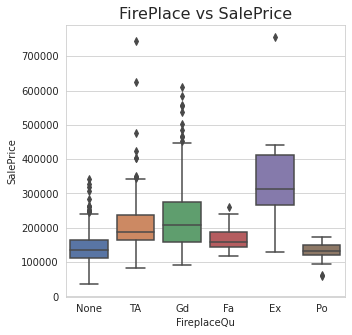

In [ ]:
# Using a barplot, we can see how the category of the FirePlace increases the value of SalePrice. It is also worth noting how much higher the value is when the house has an Excellent fireplace. This means we should keep FireplaceQu as feature.
plt.subplots(figsize=(5,5))
plt.title('FirePlace vs SalePrice',fontsize= 16)
sns.set(style="whitegrid")
sns.boxplot(x='FireplaceQu', y="SalePrice", data=df)

In [ ]:
columns_with_miss = df.isna().sum()
#filtering only the columns with at least 1 missing value
columns_with_miss = columns_with_miss[columns_with_miss>0]
#The number of columns with missing values
print('Columns with missing values:', len(columns_with_miss))
#sorting the columns by the number of missing values descending
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 5


LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
MasVnrType       8
Electrical       1
dtype: int64

### **Missing values in Numeric columns**

In [ ]:
# Another feature with a high number of missing values is LotFrontage with a count 259.
# Let’s see the correlation between the remaining features with missing values and the SalePrice.

columns_with_miss = df.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
c = list(columns_with_miss.index)
c.append('SalePrice')
df[c].corr()

,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
LotFrontage,1.000000,0.193458,0.070250,0.351799
MasVnrArea,0.193458,1.000000,0.252691,0.477493
GarageYrBlt,0.070250,0.252691,1.000000,0.486362
SalePrice,0.351799,0.477493,0.486362,1.000000


In [ ]:
# For LotFrontage, it seems there is no clue. Referring to the above correlation with SalePrice, the correlation isn't very strong. So, let's just simply fill the NA values with zeroes.
# df.loc[df['LotFrontage'].isna(),'LotFrontage'] = 0
df.LotFrontage.fillna(0, inplace=True)

In [ ]:
# Now for the GarageYrBlt. Because this column is actually a numerical feature and has NA values (which means no garage), the NA values can't be filled with 'None'. They must be filled with numerical values too. To deal with this, GarageYrBlt has high correlation with YearBuilt (0.83), meaning that the house and its garage were likely built in the same year. Hence, we will fill the NA values with the YearBuilt values, even though the house actually has no garage.

df[['GarageYrBlt','YearBuilt']].corr()

,GarageYrBlt,YearBuilt
GarageYrBlt,1.000000,0.825667
YearBuilt,0.825667,1.000000


In [ ]:
# For MasVnrType column, it is most likely that NA values means that the properties has no masonry veneer walls ('None'). This also means that the masonry veneer area is zero.

df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [ ]:
# With this have only 1 columns with missing values left in our dataset.

columns_with_miss = df.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
print(f'Columns with missing values: {len(columns_with_miss)}')
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 2


GarageYrBlt    81
Electrical      1
dtype: int64

In [ ]:
# There are only 1 NA values in Electrical column which is a categorical variable hence we can 'safely' fill them with the most frequent value of the column.

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df.loc[:,'Electrical'] = imp.fit_transform(np.array(df['Electrical']).reshape(-1,1))

In [ ]:
# Fills None in place of NaN
cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtFinType2', 'BsmtExposure', \
        'BsmtFinType1', 'Alley','FireplaceQu','PoolQC','Fence','MiscFeature','ExterQual', \
        'ExterCond', 'BsmtQual','BsmtCond', 'HeatingQC']
df[cols] = df[cols].fillna('None')
df.loc[df['SaleType'].isna(),'SaleType'] = 'Oth'

#### Nominal categorical variables don't seem to follow any clear ordering. Let's see how many values these columns can assume:

In [ ]:
cols = df.columns
num_cols = df._get_numeric_data().columns
nom_cols = list(set(cols) - set(num_cols))
print(f'Nominal columns: {len(nom_cols)}')

value_counts = {}
for c in nom_cols:
    value_counts[c] = len(df[c].value_counts())

sorted_value_counts = {k: v for k, v in \
sorted(value_counts.items(), key=lambda item: item[1])}
sorted_value_counts

Nominal columns: 43


{'Alley': 3,
 'BldgType': 5,
 'BsmtCond': 5,
 'BsmtExposure': 5,
 'BsmtFinType1': 7,
 'BsmtFinType2': 7,
 'BsmtQual': 5,
 'CentralAir': 2,
 'Condition1': 9,
 'Condition2': 8,
 'Electrical': 5,
 'ExterCond': 5,
 'ExterQual': 4,
 'Exterior1st': 15,
 'Exterior2nd': 16,
 'Fence': 5,
 'FireplaceQu': 6,
 'Foundation': 6,
 'Functional': 7,
 'GarageCond': 6,
 'GarageFinish': 4,
 'GarageQual': 6,
 'GarageType': 7,
 'Heating': 6,
 'HeatingQC': 5,
 'HouseStyle': 8,
 'KitchenQual': 4,
 'LandContour': 4,
 'LandSlope': 3,
 'LotConfig': 5,
 'LotShape': 4,
 'MSZoning': 5,
 'MasVnrType': 4,
 'MiscFeature': 5,
 'Neighborhood': 25,
 'PavedDrive': 3,
 'PoolQC': 4,
 'RoofMatl': 8,
 'RoofStyle': 6,
 'SaleCondition': 6,
 'SaleType': 9,
 'Street': 2,
 'Utilities': 2}

In [ ]:
# Another quick check is to see how many columns have lots of data equals to 0.
cols = ['LotFrontage','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath',
       'GarageCars','GarageArea']
df[cols] = df[cols].fillna(0)
df.isin([0]).sum().sort_values(ascending=False).head()

PoolArea        1453
3SsnPorch       1436
LowQualFinSF    1434
MiscVal         1408
BsmtHalfBath    1378
dtype: int64

In this case, even though there are many 0's, they have meaning. For instance, PoolArea (Pool area in square feet) equals 0 means that the house doesn't have any pool area. This is important information correlated to the house and thus, we are going to keep them.

Fill with the most frequent value
Several categorical variables give no clue about the NA values so it is quite difficult to interpret them. These variables are MSZoning, Utilities, Exterior1st, Exterior2nd, KitchenQual, and Functional. The number of NA values in each of these columns are quite few, hence we can 'safely' fill them with the most frequent value for each column.

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cols = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional']
df[cols] = imp.fit_transform(df[cols])

In [ ]:
# I discovered that the variable GrLivArea has outlier values. Precisely, one point crossed the 4000 mark. Let's remove that:
df.drop(df[df['GrLivArea'] > 4000].index, inplace=True)
df.shape #removed 4 rows

(1456, 81)

#### **Outliers**

In [ ]:
# We will take a look at the outliers in the numeric variables.
numerical_columns = \
list(df.dtypes[df.dtypes == 'int64'].index)

len(numerical_columns)

35

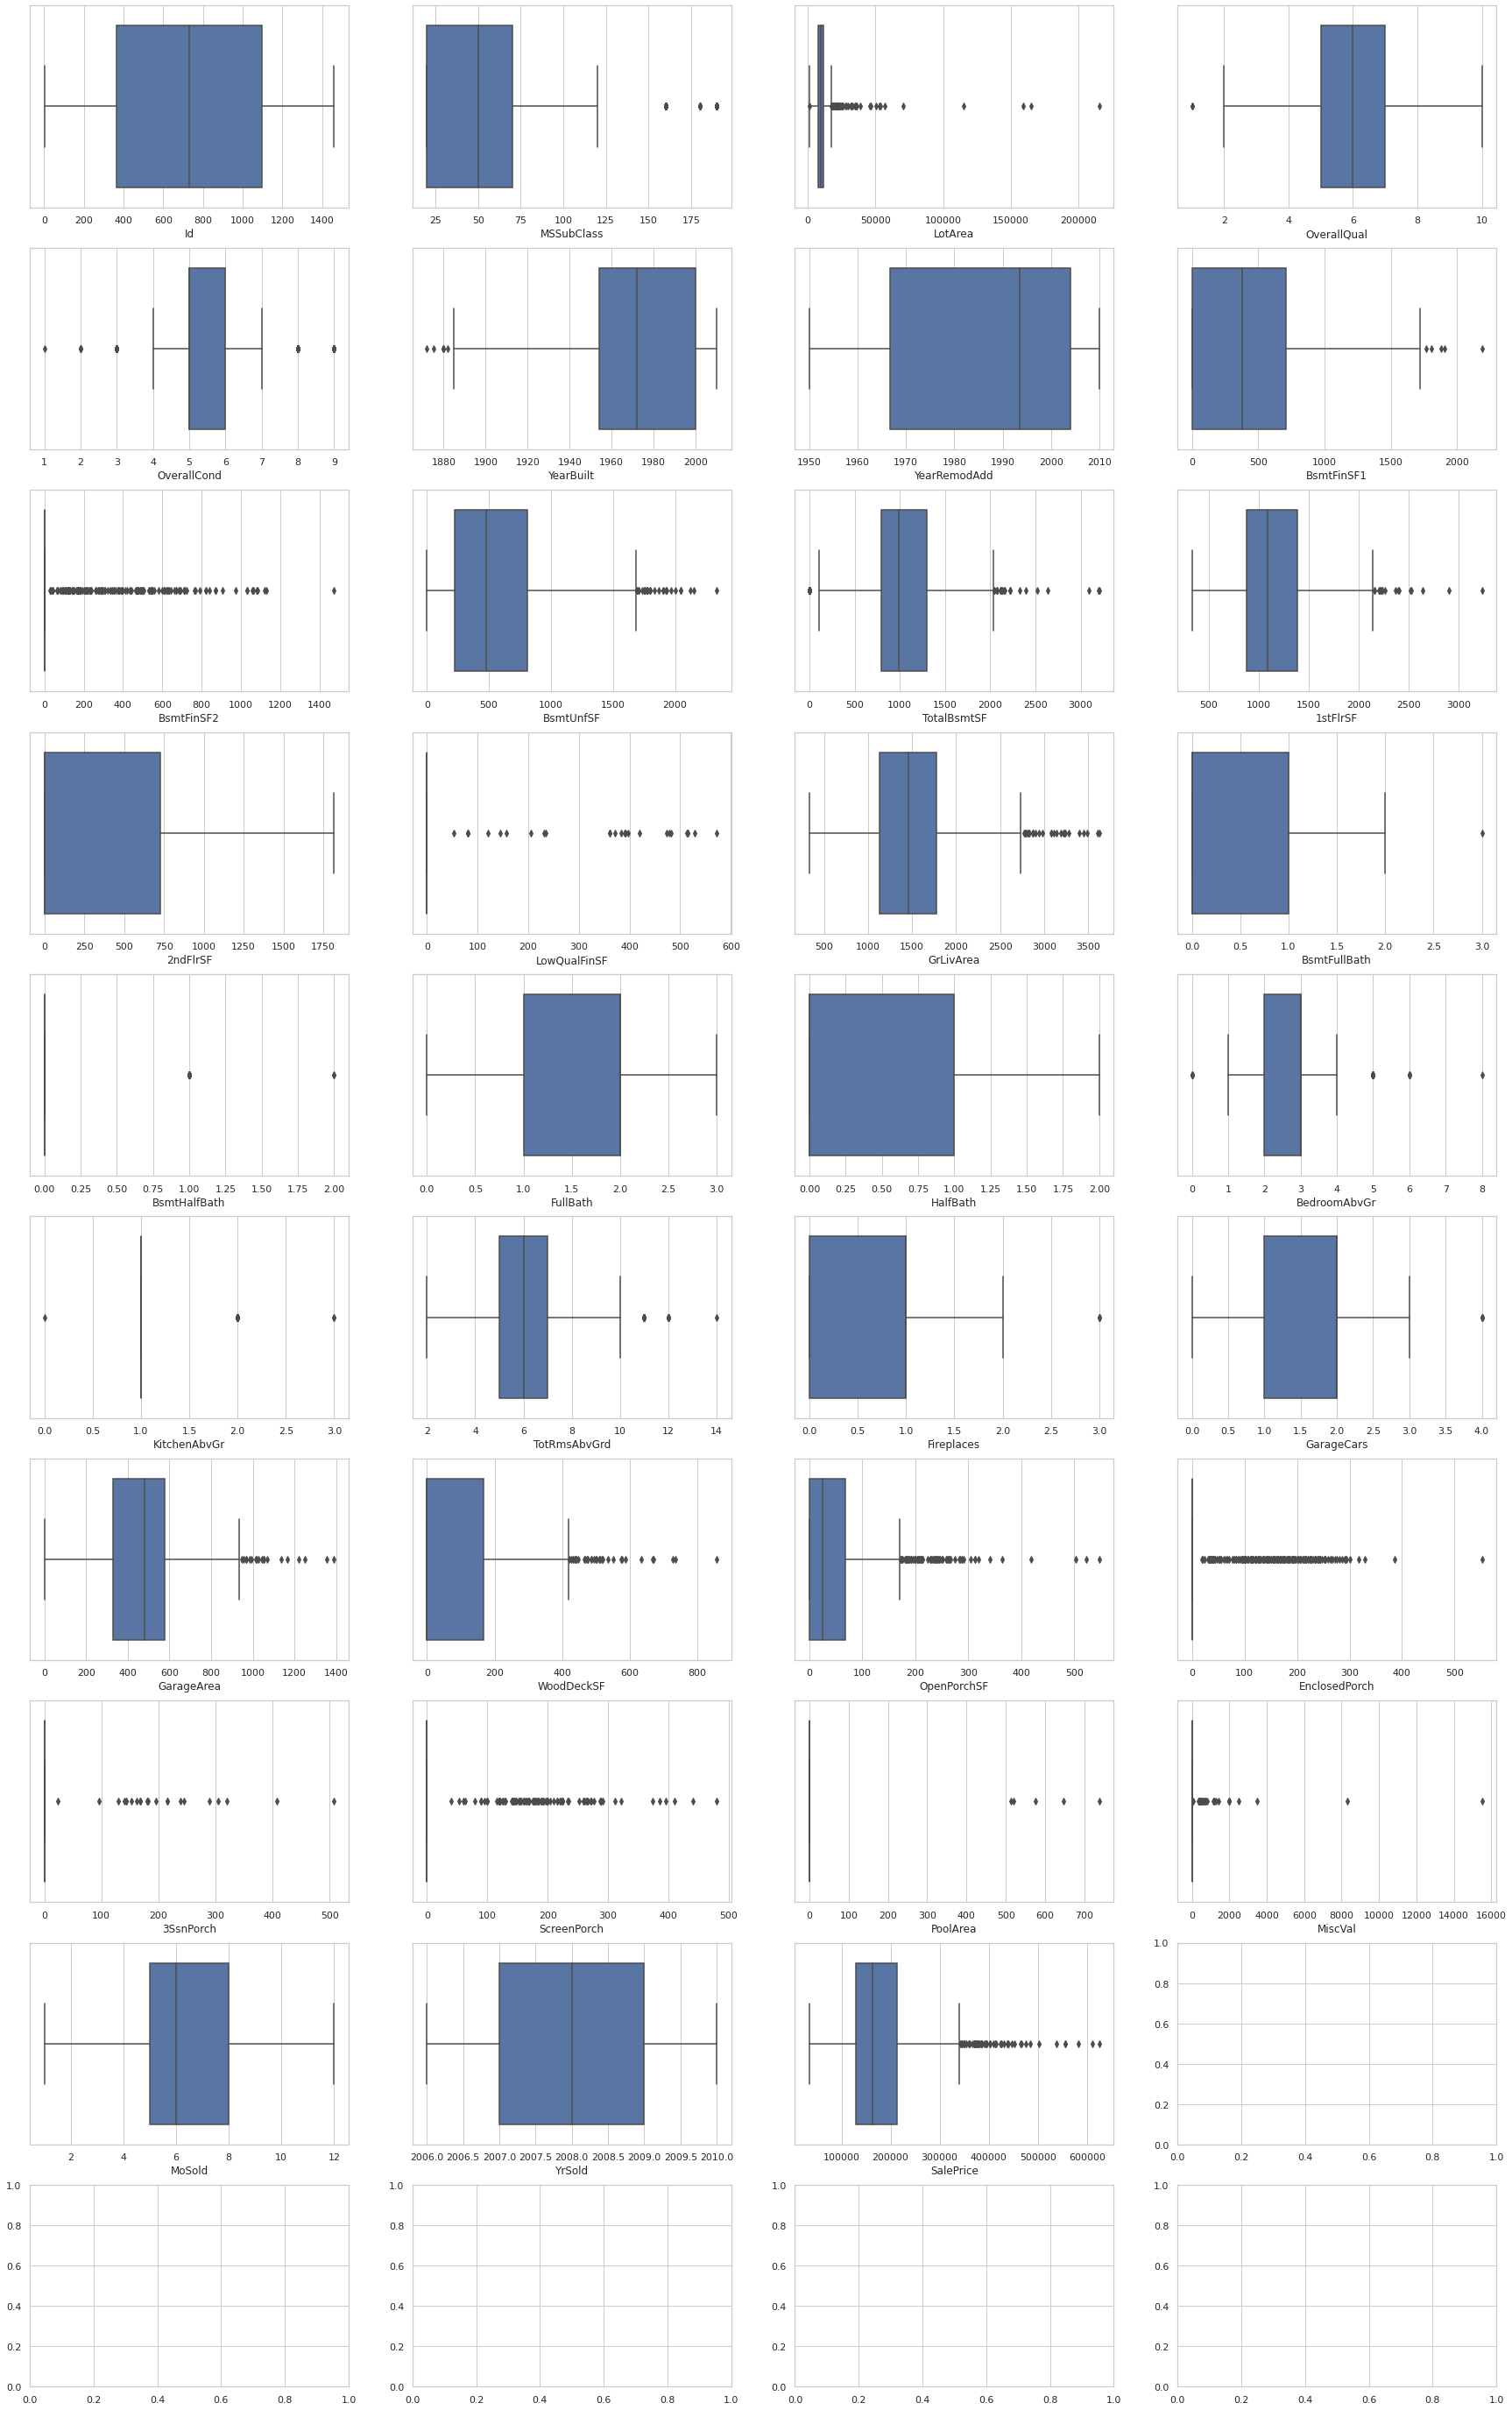

In [ ]:
# Create the plot grid
rows = 10
columns = 4
fig, axes = plt.subplots(rows,columns, figsize=(30,50))

x, y = 0, 0
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column],data=df, ax=axes[x, y])
    
    if y < columns-1:
        y += 1
    elif y == columns-1:
        x += 1
        y = 0
    else:
        y += 1

#### There are a lot of outliers in the dataset. But, if we check the data description file, we see that actually some numerical variables are categorical variables (discrete variables). So, some of these data points that seem to be outliers are actually categorical data with only one example of some category (they will be pre-processed / engineered as if they were categorical). In addition, the majority of the variables are not `normally distributed`. If we are planning to build linear regression, we might need to tackle these to improve the model performance. To tackle the 2 aspects together, We will do discretisation. I will follow discretisation with encoding of the intervals following the target mean.

In [ ]:
# Let's see how the cleaned data looks like and how many columns we have left.

columns_with_miss = df.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
print(f'Columns with missing values: {len(columns_with_miss)}')
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 1


GarageYrBlt    81
dtype: int64

In [ ]:
# Since GarageYrBlt missing means there's no garage
# we'll set it equal to 0
df.GarageYrBlt.fillna(0, inplace=True)

#  **Exploratory Data Analysis (EDA)**
In this part we would perform EDA on the the covariate against all the nominal, ordinal, discrete and continious on a general level then we will explore it all the individual bases on some very import features. We will start the EDA with the covarite <b> SalePrice 
</b>

The **Primary Task** - asked the following questions:  
   - Which single field in `dataset.csv` best describes the `SalePrice` field?
   - Why did you choose this field? Please thoroughly explain your reasoning. 	
<pre>
To answer this question we will find the feature that has the strongest correlation with 
the covariate/target variable.  For us to find out the variable/field that best describes the covariate, 
we will perform correlation analysis using scikit-learn feature selection and Spearman correlation.
</pre>

### **EDA 1**

###  We will encode the `Ordinal Features` using this **SKLearn LabelEncoder** for our Exploratory Data Analysis (EDA)

In [ ]:
dat1 = df.copy()
dat1 = dat1.drop(['Id','SalePrice'], axis=1)
y = df['SalePrice']

In [ ]:
cat_features = ['LotShape','Utilities', 'LandSlope','ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
'BsmtFinType2','HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageQual', 'BsmtCond','HeatingQC',
'GarageFinish', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']

In [ ]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
d = defaultdict(LabelEncoder)
dat1[cat_features] = dat1[cat_features].apply(lambda x: d[x.name].fit_transform(x))

In [ ]:
nom_features = ['MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood',
                'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
                'Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir',
                'GarageType','MiscFeature','SaleType','SaleCondition']

In [ ]:
df2 = pd.concat([dat1,pd.get_dummies(df['MSSubClass'],prefix='SubClass',drop_first=True)],axis=1)
df3 = pd.concat([df2,pd.get_dummies(df2[nom_features],drop_first=True)],axis=1)
data = df3.drop(columns=['MSSubClass'], axis=1)
# nom_features is droped to avoid conlinearity
data = df3.drop(columns=nom_features, axis=1)


In [ ]:
# The metric used for evaluating the models is root-mean-squared logarithmic error (RMSLE) between actual and predicted value. Taking the logarithmic value is necessary to compensate high difference values when dealing with expensive houses. For this metric, lower value means better score.
from sklearn.metrics import mean_squared_log_error, make_scorer

def funct(y_true,y_pred):
    y_new = np.maximum(y_pred,np.zeros(len(y_pred)))
    t = mean_squared_log_error(y_true,y_new)
    return np.sqrt(t)

RMSLE = make_scorer(funct, greater_is_better=False)

### To answer the primary question `Which single field in dataset.csv best describes the SalePrice field?` We will use two methods:
   1. **Important Features Selection** 
   2. **Correlation Matrix** 
   
### We will select **Important Features using SelectKBest** from sklearn package and then sort the feature to know the single field that best describe the SalePrice.

Text(0.5, 1.0, 'Feature Importances based on regression')

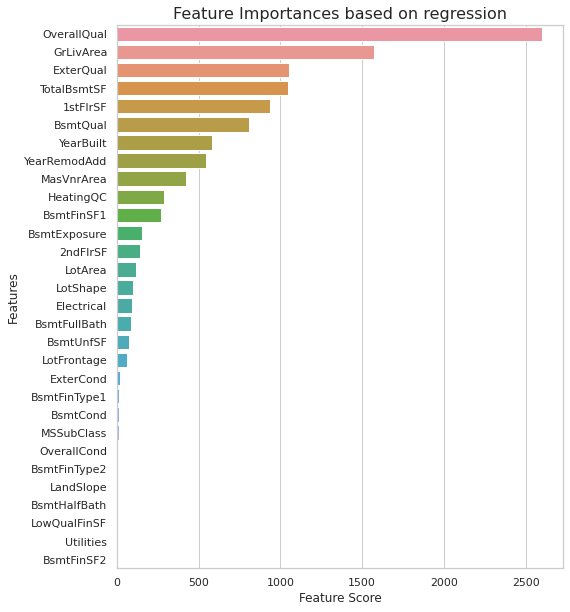

In [ ]:
X = data
# X = dat.drop('Id', inplace=True)
y = df['SalePrice']
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X,y)
indices = np.argsort(fs.scores_)[::-1]
cc = DataFrame({'Feature Score':Series(fs.scores_),'Features':Series(X.columns)})    
plt.figure(figsize=(8,10))
sns.barplot(x='Feature Score',y='Features',data=cc.head(30).sort_values(by='Feature Score',ascending=False))
plt.title('Feature Importances based on regression', fontsize=16)

#### As we can see, `OverallQual` has the highest feature importance, which is the single field that best describe the target `SalePrice` followed by other features such as OverallQual, GrLivArea, KitchenQual, GarageCars, TotalBsmtSF and so on; other features have nearly zero importance score. Next we explore the next option using correlation matrix.

### We plot the correlation matrix against the target variable `SalePrice to find that single field in our dataset that best describe the SalePrice`

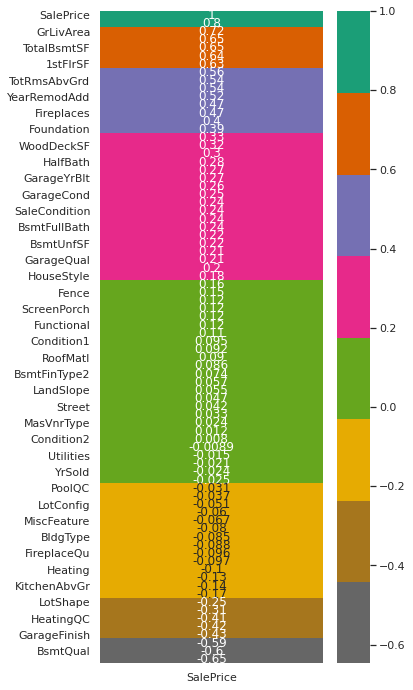

In [ ]:
X = df.copy()
X.drop('Id', axis=1, inplace=True)
plt.figure(figsize=(5,12))
sns.set(font_scale=1)
sns.heatmap(X.corr()[['SalePrice']].sort_values('SalePrice', ascending=False), annot=True, cmap='Dark2_r');

#### From the second row of this map. We can see the correlation of all variables against SalePrice, some variables seem to be strongly correlated with the target variable. `OverallQual` feature is 79% correlated with the target variable. Overallqual feature refers to the overall material and quality of the materials of the completed house. `This make sense as well. People usually consider these parameters for their dream house. In addition, GrLivArea is 70% correlated with the target variable. GrLivArea refers to the living area (in sq ft.) above ground. The following variables show people also care about if the house has a garage, the area of that garage, the size of the basement area, etc`.

### EDA 2

[Text(0.5, 0, '')]

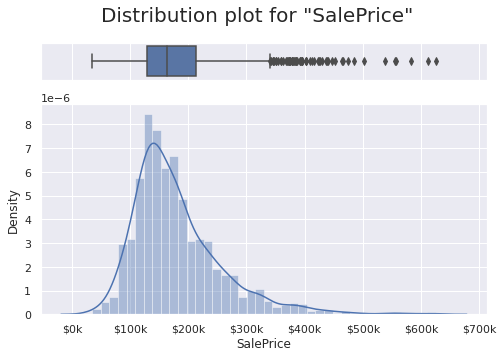

In [ ]:
#  The most important variable here is the target variable 
# SalePrice. I expect its distribution to be right skewed because it seems, at least to me, there's no upper limit on how luxurious a house could be but of course there's a lower limit.Let’s check its distribution.

#Function for formating y-label to $(amount)k or $(amount)M

def currency(x,pos):
    if x >= 10**6:
        return '${:1.2f}M'.format(x*1e-6)
    return '${:1.0f}k'.format(x*1e-3)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,
                                    figsize=(8,5), gridspec_kw={"height_ratios": (.15, .85)})
plt.suptitle('Distribution plot for "SalePrice"', fontsize=20)
formater = tck.FuncFormatter(currency)
ax_hist.xaxis.set_major_formatter(formater)
sns.boxplot(df['SalePrice'].dropna(), ax=ax_box)
sns.distplot(df['SalePrice'].dropna(), ax=ax_hist)
ax_box.set(xlabel='')

####  The SalePrice does not follow normal distribution. It has positive skewness. It shows that very small number of houses have very high SalePrice. Also the SalePrice is not linear, which means we cannot find of a straight line that would fit through the SalePrice data. So we have to transform SalePrice so that it’ll have normal distribution.
#### When the target feature is normally distributed (or close to normal) target feature, it would help in better modeling of the relationship between target and the independent variables. Let's log transform this variable and see if this variable distribution can get any closer to normal.


In [ ]:
print('"SalePrice" kurtosis = ', np.round(df['SalePrice'].kurtosis(),2), 
    '\n"SalePrice skewness = ', np.round(df['SalePrice'].skew(),2))
transform_ = np.log(df.SalePrice)

"SalePrice" kurtosis =  3.89 
"SalePrice skewness =  1.57


[Text(0.5, 0, '')]

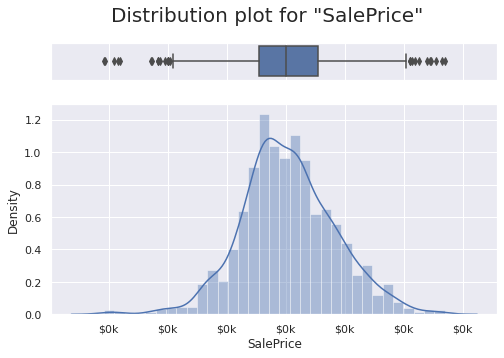

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,
                                    figsize=(8,5), gridspec_kw={"height_ratios": (.15, .85)})
plt.suptitle('Distribution plot for "SalePrice"', fontsize=20)
formater = tck.FuncFormatter(currency)
ax_hist.xaxis.set_major_formatter(formater)
sns.boxplot(transform_.dropna(), ax=ax_box)
sns.distplot(transform_.dropna().dropna(), ax=ax_hist)
ax_box.set(xlabel='')

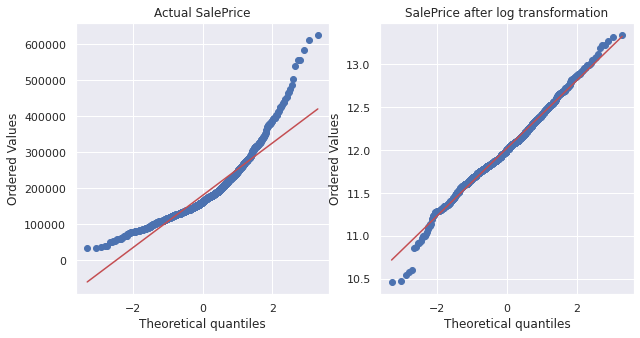

In [ ]:
figure = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
stats.probplot(df.SalePrice, plot=plt)
plt.title("Actual SalePrice")
plt.subplot(1,2,2)
transform_ = np.log(df.SalePrice)
stats.probplot(transform_, plot=plt)
plt.title("SalePrice after log transformation")
plt.show()

#### As we can saw, log transformation of the target variable has helped us fixing its skewed distribution and the new distribution looks closer to normal. Since we have 80 variables, visualizing one by one wouldn't be an astute approach. Instead, we'll look at some variables based on their correlation with the covariate/target variable (SalePrice). However, we will come up with a way to plot all variables at once, and we'll look at it as well and draw some insight from them. we'll separate numeric and categorical variables and explore this data from different angles.


### **EDA 3**
#### We start by looking at the distribution of the sales price, this we give us an insight of how the sales price are distributed. The price range for the cheapest, the costliest house etc. We will accomplish this using a histogram chart.

The cheapest house sold for $34,900 and the most expensive for $625,000
The average sales price is $180,151, while median is $163,000


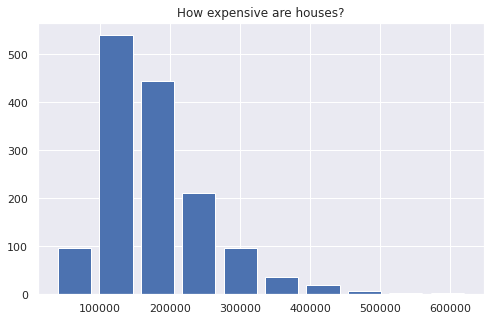

In [ ]:
# How expensive are houses?
# Let's plot this table and understand the median behavior using a bar graph.
print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    df.SalePrice.min(), df.SalePrice.max()))
print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    df.SalePrice.mean(), df.SalePrice.median()))
df.SalePrice.hist(rwidth=.8, figsize=(8,5))
plt.title('How expensive are houses?')
plt.show()

### **SalePrice vs Overall Quality**
The overall quality is measured on a scale of 1 to 10. Hence, we can fairly treat it as an ordinal variable. An ordinal variable has an inherent order. Let's check the median sale price of houses with respect to OverallQual. You might be wondering, “Why median ?” We are using median because the target variable is skewed. A skewed variable has outliers and median is robust to outliers. We can create such aggregated tables using pandas pivot tables quite easily.

In [ ]:
# Let's check the OverallQual variable in detail.
df['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [ ]:
#let's check the mean price per quality and plot it.
pivot = df.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


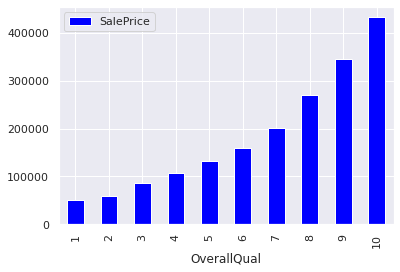

In [ ]:
# Let's plot this table and understand the median behavior using a bar graph.
pivot.plot(kind='bar', color='blue')

<pre>
This behavior is quite normal. As the overall quality of a house increases, its sale price also increases. Let's visualize 
the next correlated variable GrLivArea and understand their behavior.
</pre>

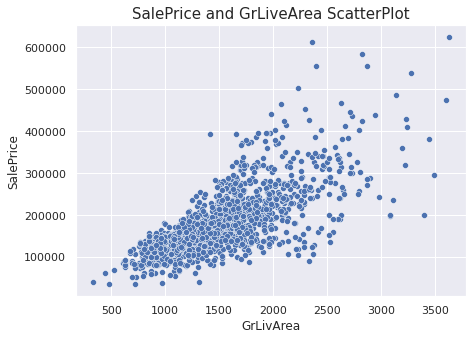

In [ ]:
plt.figure(figsize=(7,5))
plt.title("SalePrice and GrLiveArea ScatterPlot",fontsize=15)
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df)

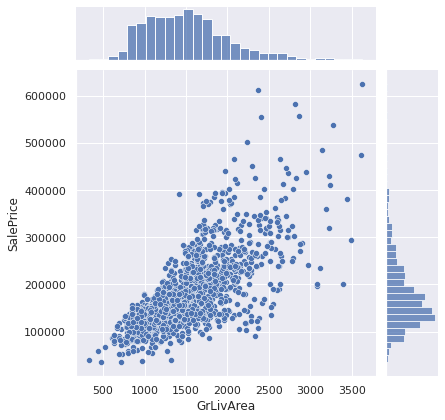

In [ ]:
#GrLivArea variable
sns.jointplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.show()

As seen above, here also we see a direct correlation of living area with sale price. However, we can spot an outlier value GrLivArea > 5000. I've seen outliers play a significant role in spoiling a model's performance. Hence, we'll get rid of it.

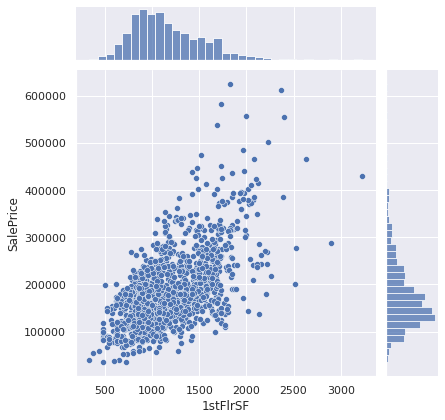

In [ ]:
sns.jointplot(x=df['1stFlrSF'], y=df['SalePrice']);

#### From the scatter plot, we see here that we have a positive relationship between the 1stFlrSF of the house and the SalePrice of the house. In other words, the larger the first floor of a house, the higher the likely sale price.

Let's check the median sale price of a house based on its SaleCondition. SaleCondition explains the condition of sale. Not much information is given about its categories.

In [ ]:
sp_pivot = df.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
sp_pivot

,SalePrice
SaleCondition,
Abnorml,130000
AdjLand,104000
Alloca,148145
Family,140500
Normal,160000
Partial,246578


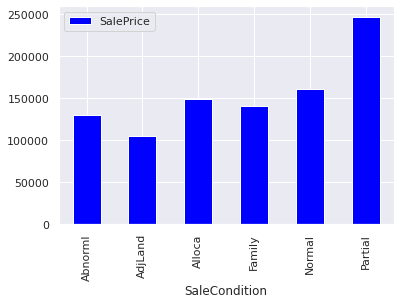

In [ ]:
sp_pivot.plot(kind='bar',color='blue')

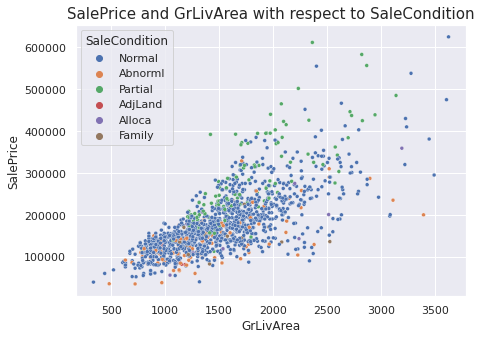

In [ ]:
plt.figure(figsize=(7,5))
plt.title("SalePrice and GrLivArea with respect to SaleCondition", fontsize=15)
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="SaleCondition", s=15, data=df);

### **EDA 4**
#### **Building Type**


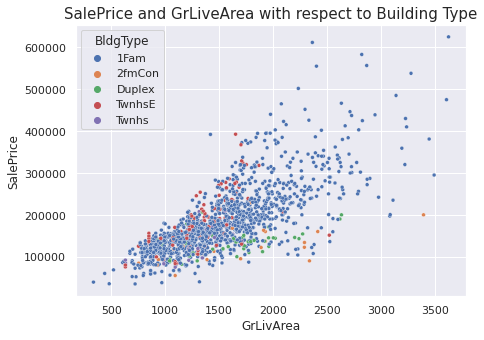

In [ ]:
# The type of a building clearly affects the valuation. The two types of townhouses as well as the 2-family condo and duplex type are summarized into a single category.

plt.figure(figsize=(7,5))
plt.title("SalePrice and GrLiveArea with respect to Building Type",fontsize=15)
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="BldgType", s=15, data=df);

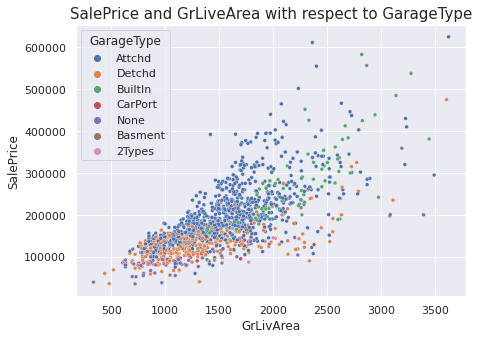

In [ ]:
plt.figure(figsize=(7,5))
plt.title("SalePrice and GrLiveArea with respect to GarageType",fontsize=15)
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="GarageType", s=15, data=df);

### **EDA 5**
<pre>
Let's also view the distribution of the house prices within MSZoning, we would accomplish this using a boxplot chart. The boxplot 
chart shows what price ranges are outside the normal in those areas. These abnormal price ranges are called outliers.
<pre

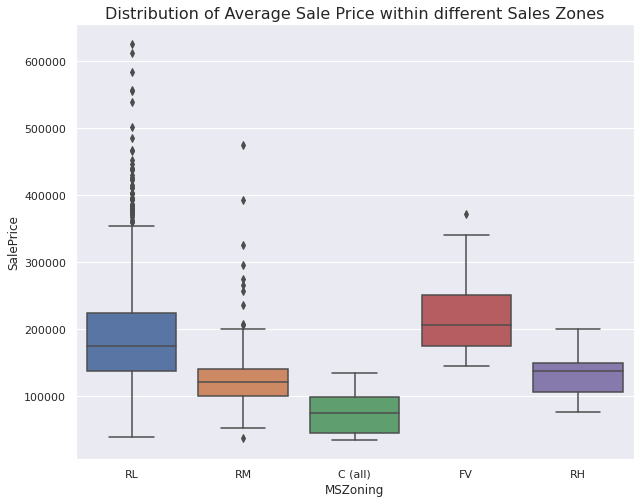

In [ ]:
plt.subplots(figsize=(10,8))
plt.title('Distribution of Average Sale Price within different Sales Zones',fontsize= 16)
sns.boxplot(df.MSZoning,df.SalePrice)
plt.show()

<pre> FV (Floating Village Residential) has the highest sales with the average SalePrice of about $200000 and 25 percentile of the 
SalePrice is about $150,000. 
SalePrice of $380,000 and above in the FV (Floating Village Residential Zone) is an outliers 
because it's above the 75 percentile </br> of the SalePrice for that Zone. The next is the RL (Residential Low Density) with 
average SalePrice of about $180,0000 and a low SalePrice of about $40000. </br> RH (Residential High Density Park) and R 
(Residential Med) have almost the 
75 percentile of SalePrice, but the average SalePrice of RH is about $150,000 </br> above the RM. The last but not the least is the c (Commerical Zone) whose average SalePrice is below $100,000.

### **EDA 6**
<pre>
Next we inspect if the sales price depends on the lot size area. Does the cost of a house increase with the lot size area or vice versa? 
We will accomplish this using a scatterplot, by plotting the sales price against LotSizeArea.
</pre>

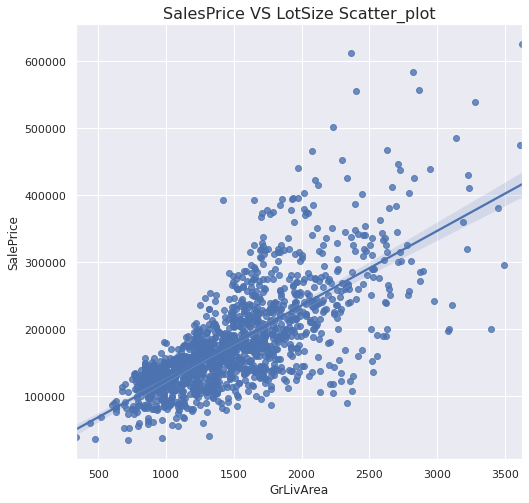

In [ ]:
plt.subplots(figsize=(8,8))
plt.title('SalesPrice VS LotSize Scatter_plot',fontsize= 16)
sns.regplot(x="GrLivArea", y="SalePrice", data=df);

###  **EDA 7**
Another insight could be to know if the SalePrice of a house increase with the age of the house. Even though the age wasn't given, we can will create a feature called age, but subtracting the year built from the current year we are in or any of your choosing. If you do this you may now plot the sales price against the age of the house, using a scatter plot.


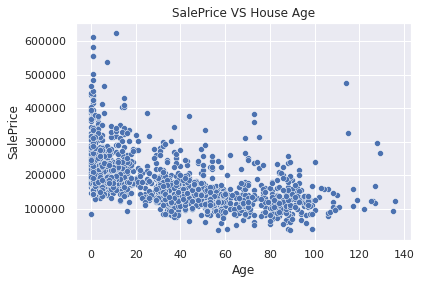

In [ ]:
df["Age"] = df["YrSold"] - df["YearBuilt"]
sns.scatterplot(x='Age', y='SalePrice', data=df)
plt.title('SalePrice VS House Age')
plt.show()
df.drop('Age', axis=1, inplace=True)

More of newer houses were sold at higher prices when compared to above 40 years. The sales didn't really drop except for houses that are 100years and above. Another thing to consider when looking at year greater than or equal to 40 years, did renovation of the house bring about the increase SalePrice.

### **EDA 8**
#### **Price per square foot**
It's useful to look at price per square foot, a typically used metric. The majority of SalePrice during the time period 
were focused around a price of roughly $125 per square foot.

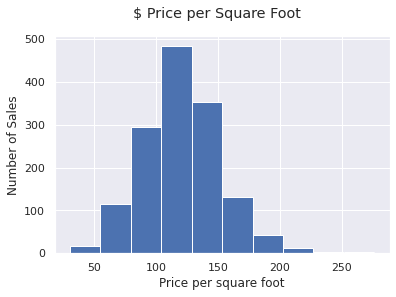

In [ ]:
df['PriceSquareFoot'] = df['SalePrice']/df['GrLivArea']
plt.hist(df['PriceSquareFoot'])
plt.suptitle('$ Price per Square Foot')
plt.ylabel('Number of Sales')
plt.xlabel('Price per square foot')
plt.show()

### **EDA 9**
##### **SalePrice by neighborhood**
<pre>
Next we explore the neighbourhood feature, in which neighbourhood does house price cost the more? 
What’s the average or median cost of a house in those neighbourhood?
</pre>

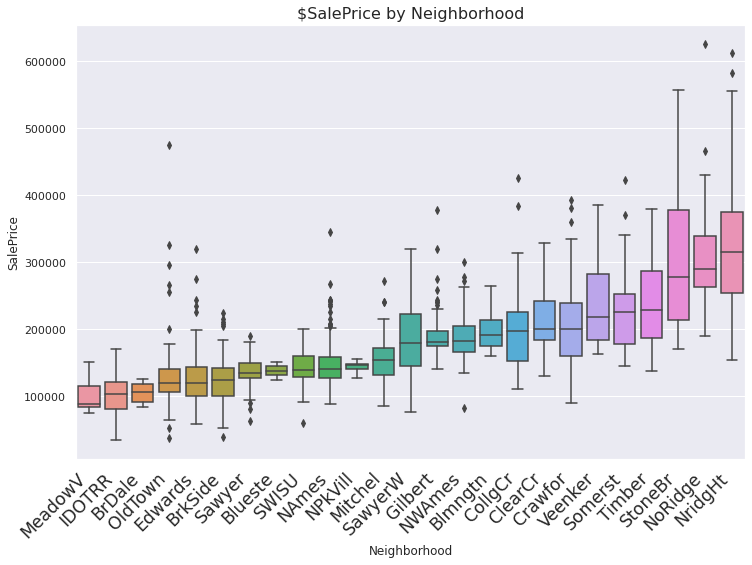

In [ ]:
plt.figure(figsize=(12,8))
plt.title('$SalePrice by Neighborhood',fontsize= 16)
sorted_nb = df.groupby(['Neighborhood'])['SalePrice'].median().sort_values()
sns.boxplot(x=df['Neighborhood'], y=df['SalePrice'], order=list(sorted_nb.index))
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')
plt.show()

<p>
In the above plot we sorted our neighborhoods by median price. This figure gives us a lot of information. We can see that in the cheapest neighborhoods houses sell for a median price of around $100,000 and in the most expensive neighborhoods houses sell for around $300,000. We can also see that for some neighborhoods, dispersion between the prices is very low, meaning that all the prices are close to each other. In the most expensive neighborhood NridgHt, however, we see a large box — there is large dispersion in the distribution of prices.
</p>

### **EDA 10**
#### **SalePrice and Sales by Month**
<pre>
Another is at which months of the year is house mostly sold and is cheapest? The idea is that the cost of a house may drop at months where a great number of 
houses are being sold. Use the countplot function of seaborn to get the total houses sold in various months and barchart to get the average cost of houses 
at those months. You may also check which years did we have the greatest house sales and what was the total revenue generated in those years?
</pre>

Oldest house built in 1872. Newest house built in 2010.


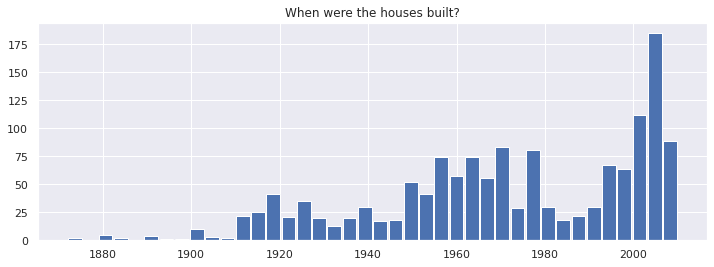

In [ ]:
# When were the houses built?
print('Oldest house built in {}. Newest house built in {}.'.format(
    df.YearBuilt.min(), df.YearBuilt.max()))
df.YearBuilt.hist(bins = 40, rwidth=.9, figsize=(12,4))
plt.title('When were the houses built?')
plt.show()

Not much action in the 80s apparently. Looks like majority of houses were built in the 50s and after, which good chunk of new houses built in the aughts.

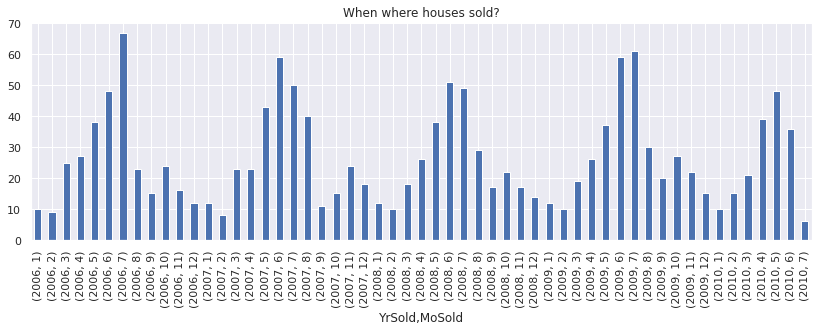

In [ ]:
# When where houses sold?
df.groupby(['YrSold','MoSold']).Id.count().plot(kind='bar', figsize=(14,4))
plt.title('When where houses sold?')
plt.show()

So this is interesting. We see a strong seasonal pattern in house sales, with peaks in June and July. We verify that the dataset spans 2006 to 2010, but note that data steps mid-year in July of 2010.
At this point I'm wondering if the time of year a house is sold has any effect on sales price. We'll address this question once we start our multivariate analysis later on.

### **EDA 11**
#### **SalePrice by overall quality**
<pre>
SalePrice by overall quality appears to reflect quality to some degree. 
</pre>

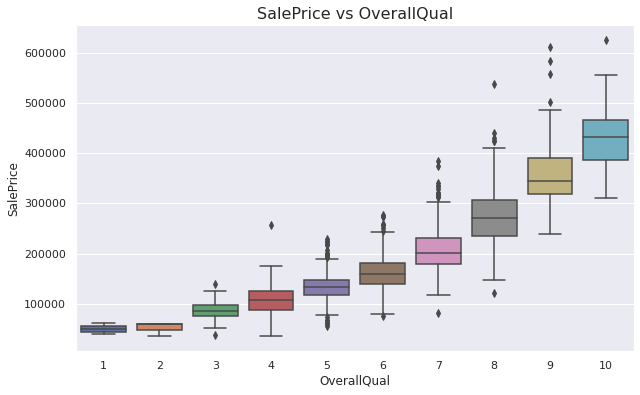

In [ ]:
plt.subplots(figsize=(10,6))
plt.title('SalePrice vs OverallQual',fontsize= 16)
sns.boxplot(df.OverallQual, df.SalePrice)
plt.show()

### **EDA 12**
#### **Price Square Foot vs Over all Quality**

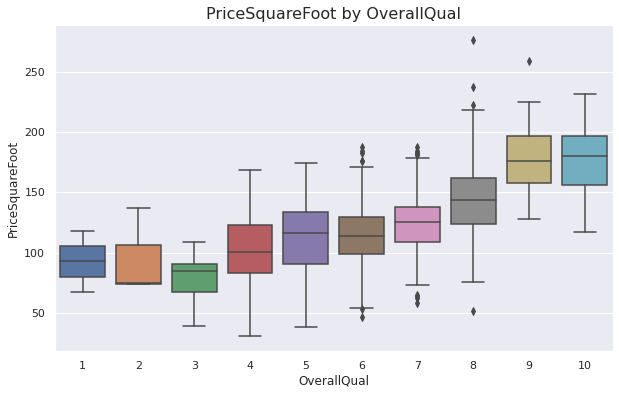

In [ ]:
plt.subplots(figsize=(10,6))
plt.title('PriceSquareFoot by OverallQual',fontsize= 16)
sns.boxplot(df.OverallQual, df.PriceSquareFoot)
plt.show()
df.drop('PriceSquareFoot', axis=1, inplace=True)

### **EDA 13**
#### **Sale price dependence on nominal features**
##### First, we will examine the relation between the property sale price with all of the nominal features by using boxplot. The purpose of this plotting routine is to find several variables which might affect the sale price significantly.


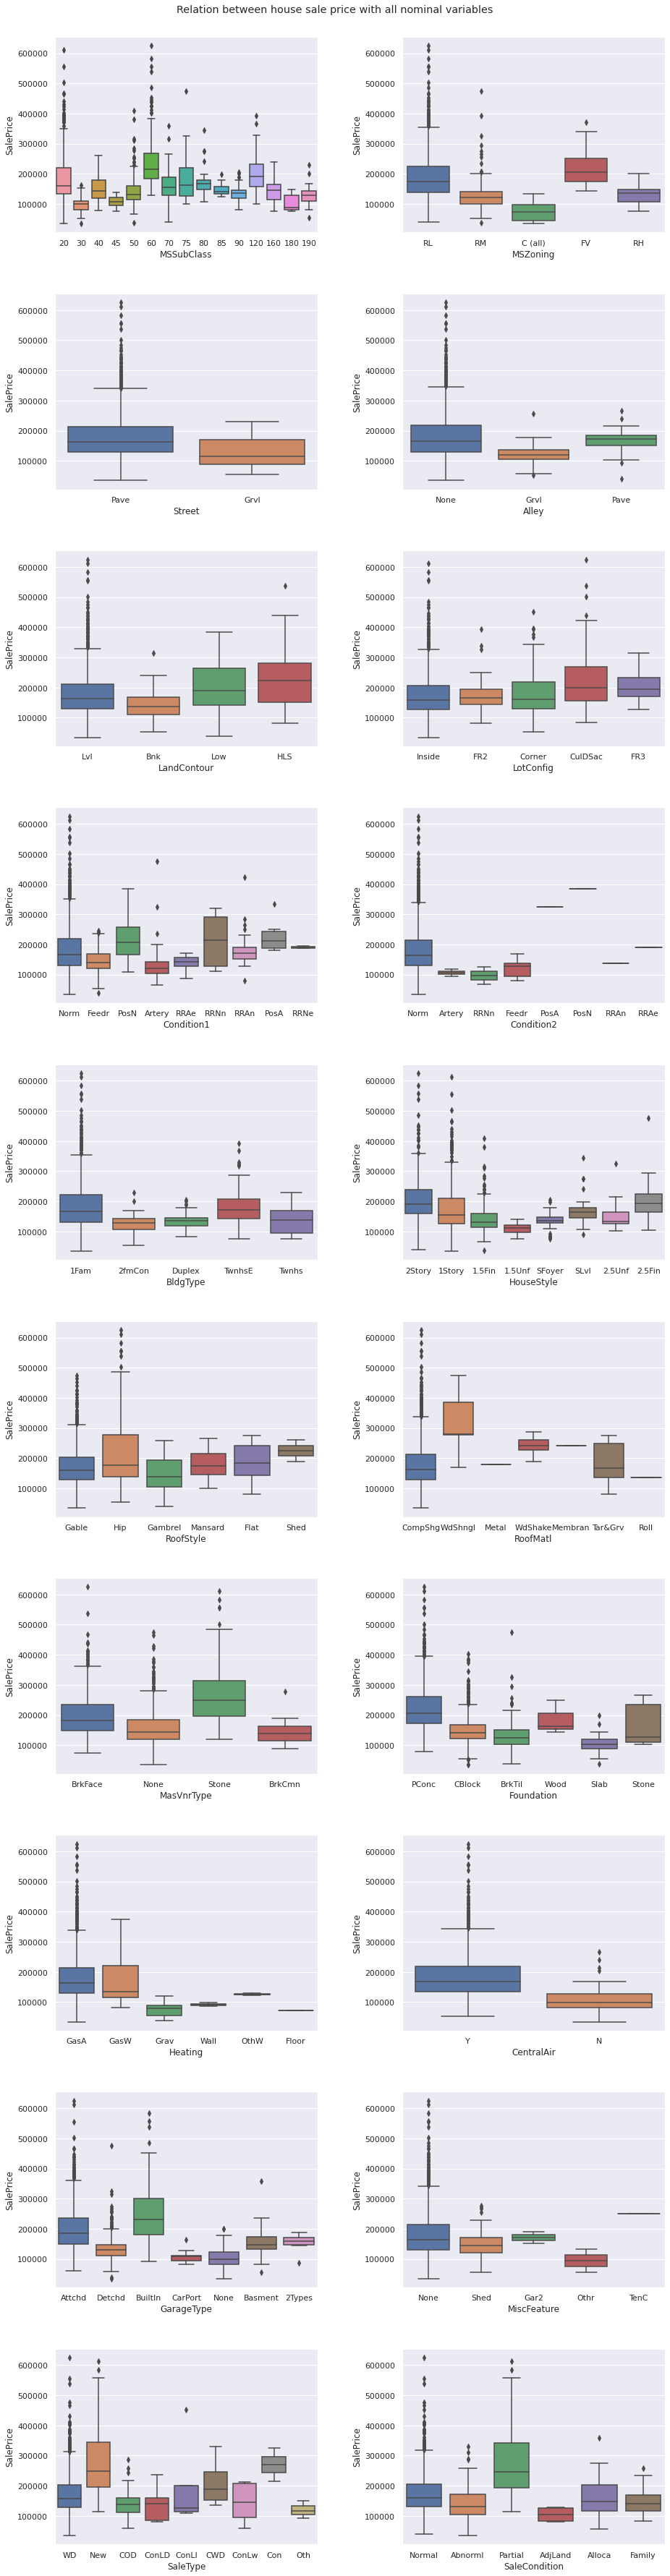

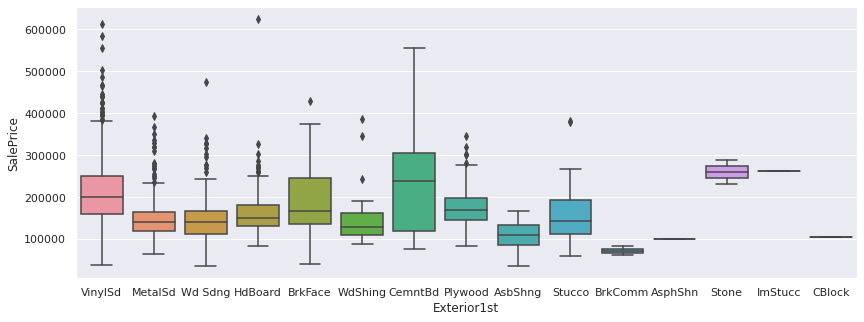

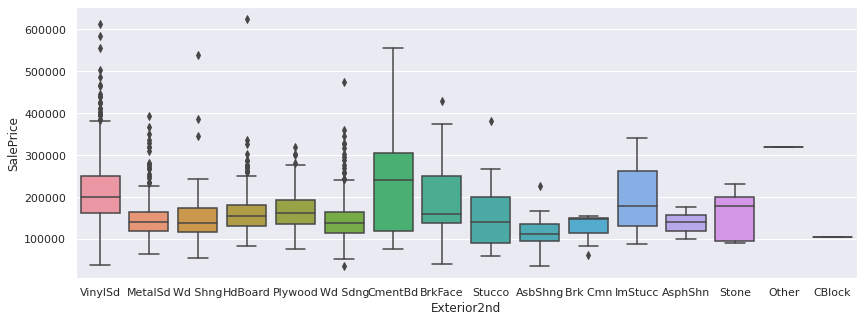

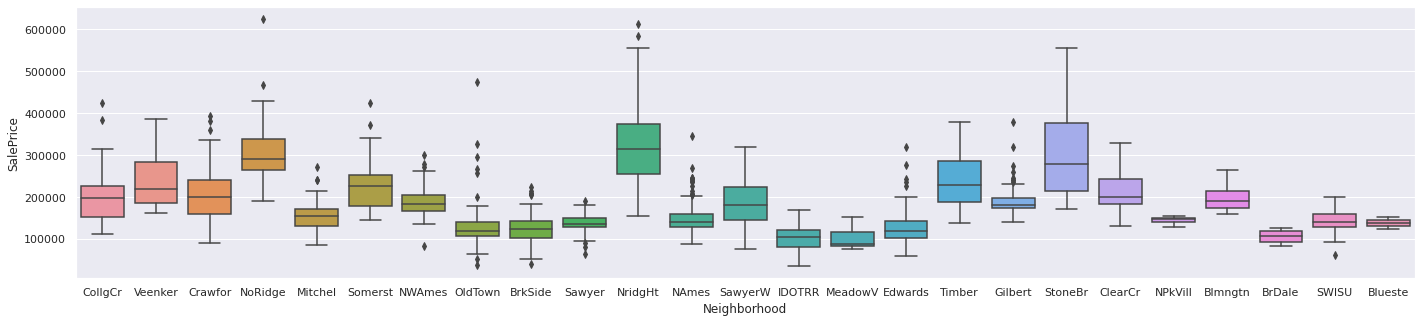

In [ ]:
cols = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'GarageType', 
        'MiscFeature', 'SaleType', 'SaleCondition']
fig = plt.figure(figsize=(14,50))
for c,i in zip(cols, range(1,21)):
    ax = fig.add_subplot(10,2,i)
    sns.boxplot(x=c,y='SalePrice',data=df)
fig.suptitle('Relation between house sale price with all nominal variables',y=0.999)
fig.tight_layout(pad=4.0)
plt.figure(figsize=(14,5))
sns.boxplot(x='Exterior1st',y='SalePrice',data=df)
plt.figure(figsize=(14,5))
sns.boxplot(x='Exterior2nd',y='SalePrice',data=df)
plt.figure(figsize=(24,5))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)

#### **Remarks**:

1. Properties with paved road and alley access are more expensive than the gravel ones.
1. Most of the properties have no alley access.
1. It seems that properties with hillside slope tend to have higher sale price.
1. Properties with hip and wood shingles roof tend to have higher sale price.
1. Properties with stone masonry veneer tend to have higher sale price.
1. Most of the properties have GasA heating type (gas forced warm air furnace).
1. Properties which have central air 
conditioning are more expensive.
1. Most of the properties have no miscellaneous (i.e. only one property has a tennis court).
1. Properties which just constructed and sold tend to have higher sale price.

### **EDA 14**
#### Sale price dependence on ordinal features
#### Next, we will examine the relation between the property sale price with all of the ordinal features, also using boxplot.

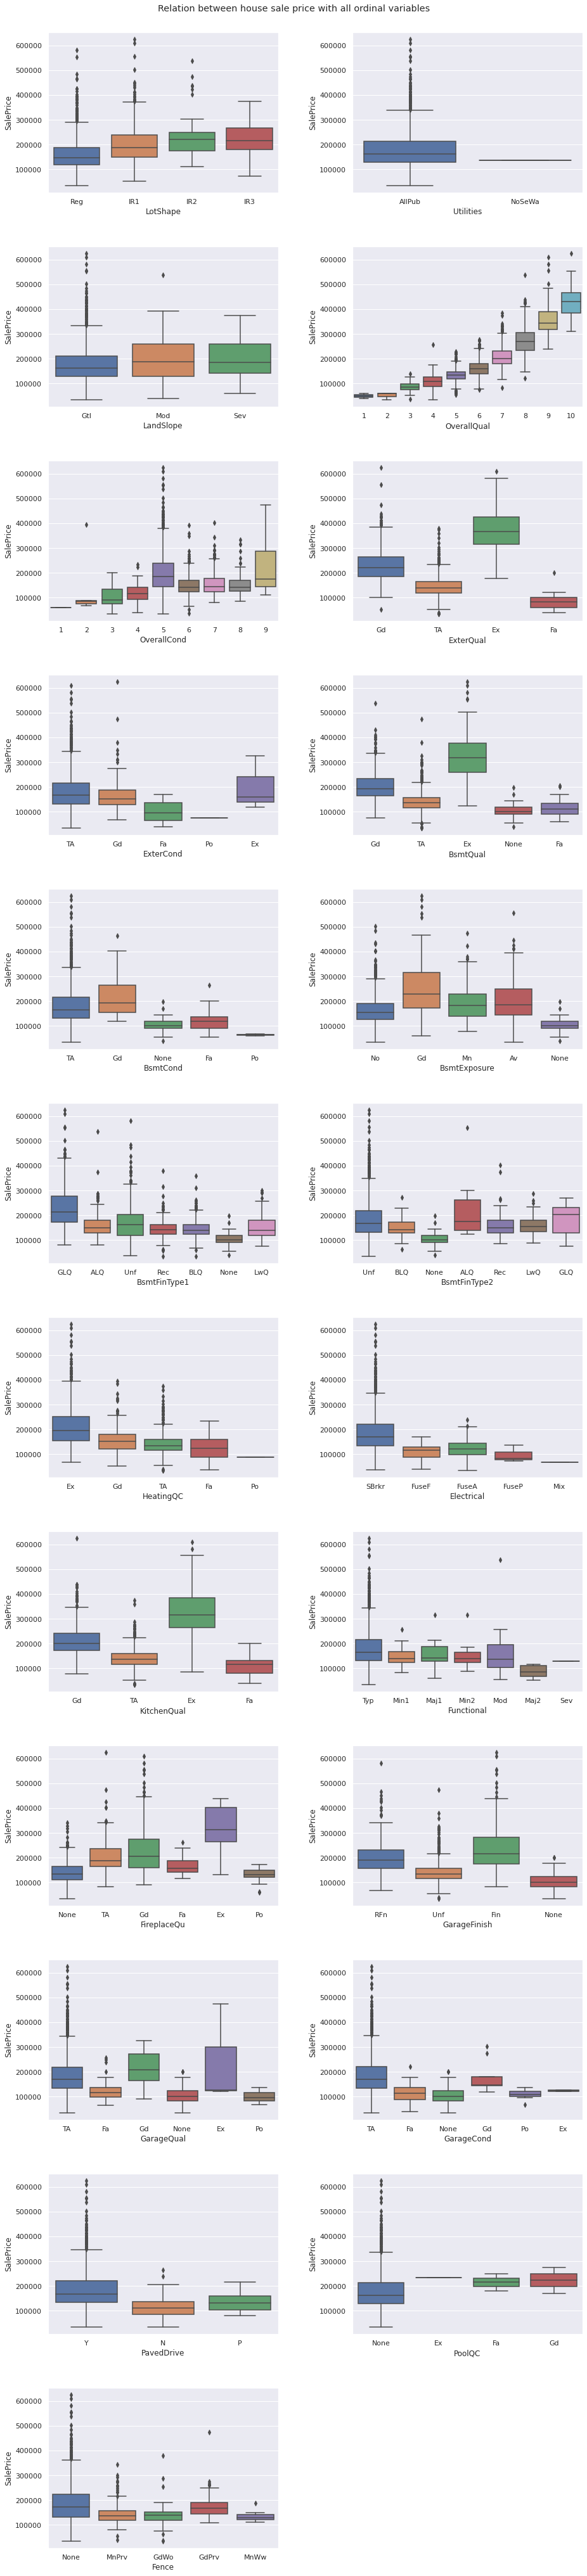

In [ ]:
cols = ['LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
        'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']
fig = plt.figure(figsize=(14,57))
for c,i in zip(cols, range(1,24)):
    ax = fig.add_subplot(12,2,i)
    sns.boxplot(x=c,y='SalePrice',data=df)
fig.suptitle('Relation between house sale price with all ordinal variables', y=0.999)
fig.tight_layout(pad=4.0)

#### **Remarks**:

1. Most of the properties have all public utilities (electricity, gas, water, and septic tank).
1. Clearly, overall quality score of the property reflects the sale price (higher score means more expensive).
1. Properties with excellent exterior material quality are more expensive than the others.
1. Properties with excellent basement heights (100+ inches) are more expensive than the others.
1. Properties with excellent kitchen quality are more expensive than the others.
1. It seems that properties with excellent fireplac quality to have higher sale price.
1. Properties with finished excellent quality garage tend to have higher sale price.
1. Properties with excellent pool quality are more expensive than the others.



### **EDA 15**
#### **Sale price dependence on discrete numerical features**

##### Next, we will examine the relation between the property sale price with all of the discrete numerical features. This can be achieved by using boxplot or scatterplot. We will use the scatterplot for YearBuilt, YearRemodAdd, and GarageYrBlt for much easier interpretation.

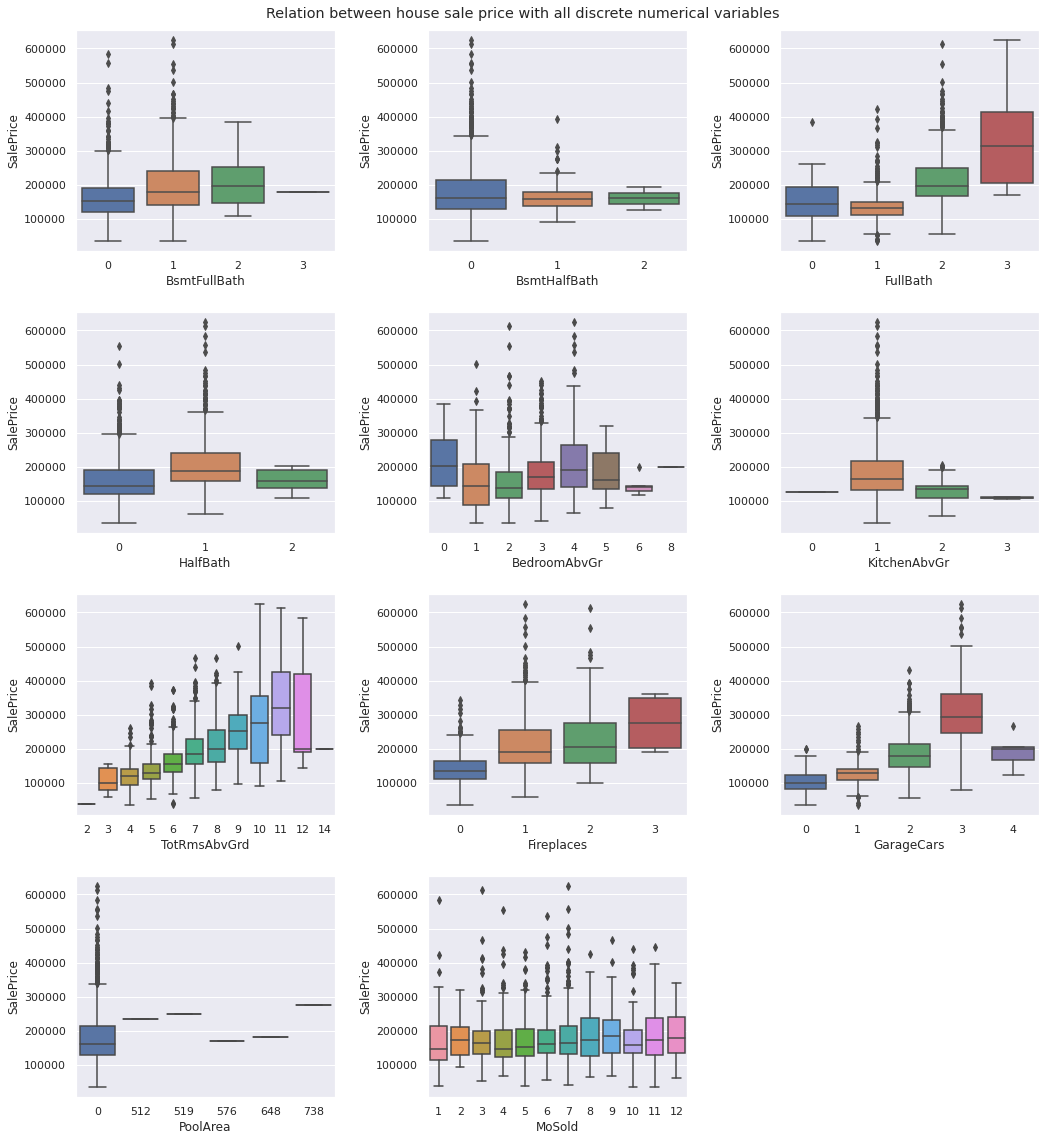

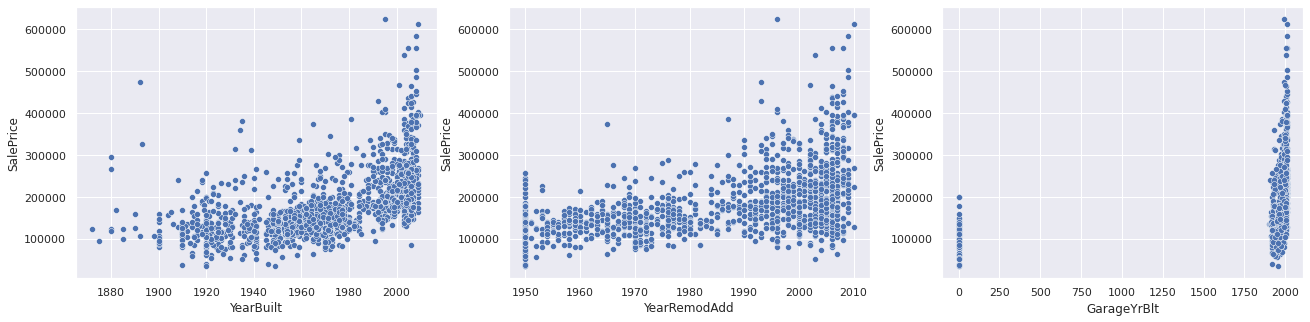

In [ ]:
cols1 = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold', 'YrSold']
cols2 = ['YearBuilt','YearRemodAdd','GarageYrBlt']
fig = plt.figure(figsize=(15,16))
for c,i in zip(cols1, range(1,12)):
    ax = fig.add_subplot(4,3,i)
    sns.boxplot(x=c,y='SalePrice',data=df)
fig.suptitle('Relation between house sale price with all discrete numerical variables', y=0.999)
fig.tight_layout(pad=2.0)
fig = plt.figure(figsize=(22,5))
for c,i in zip(cols2, range(1,4)):
    ax = fig.add_subplot(1,3,i)
    sns.scatterplot(x=c,y='SalePrice',data=df)

#### **Remarks**:

1. Properties with more full bathrooms above grade tend to have higher sale price.
1. Properties with one half bathroom above grade are more expensive than the others.
1. Having more rooms in a property (total rooms except bathrooms) tend to increase its sale price. However, if it has too many rooms (>10), the price will decrease.
1. Properties with more fireplaces tend to have higher sale price.
1. Large garage capacity (how many cars can be parked) tend to increase the sale price of the property as long as the capacity is under 3 cars.



### **EDA 16**
#### **Sale price dependence on continuous numerical features**
#### Next, we will examine the relation between the property sale price with all of the continuous numerical features by using scatterplot.

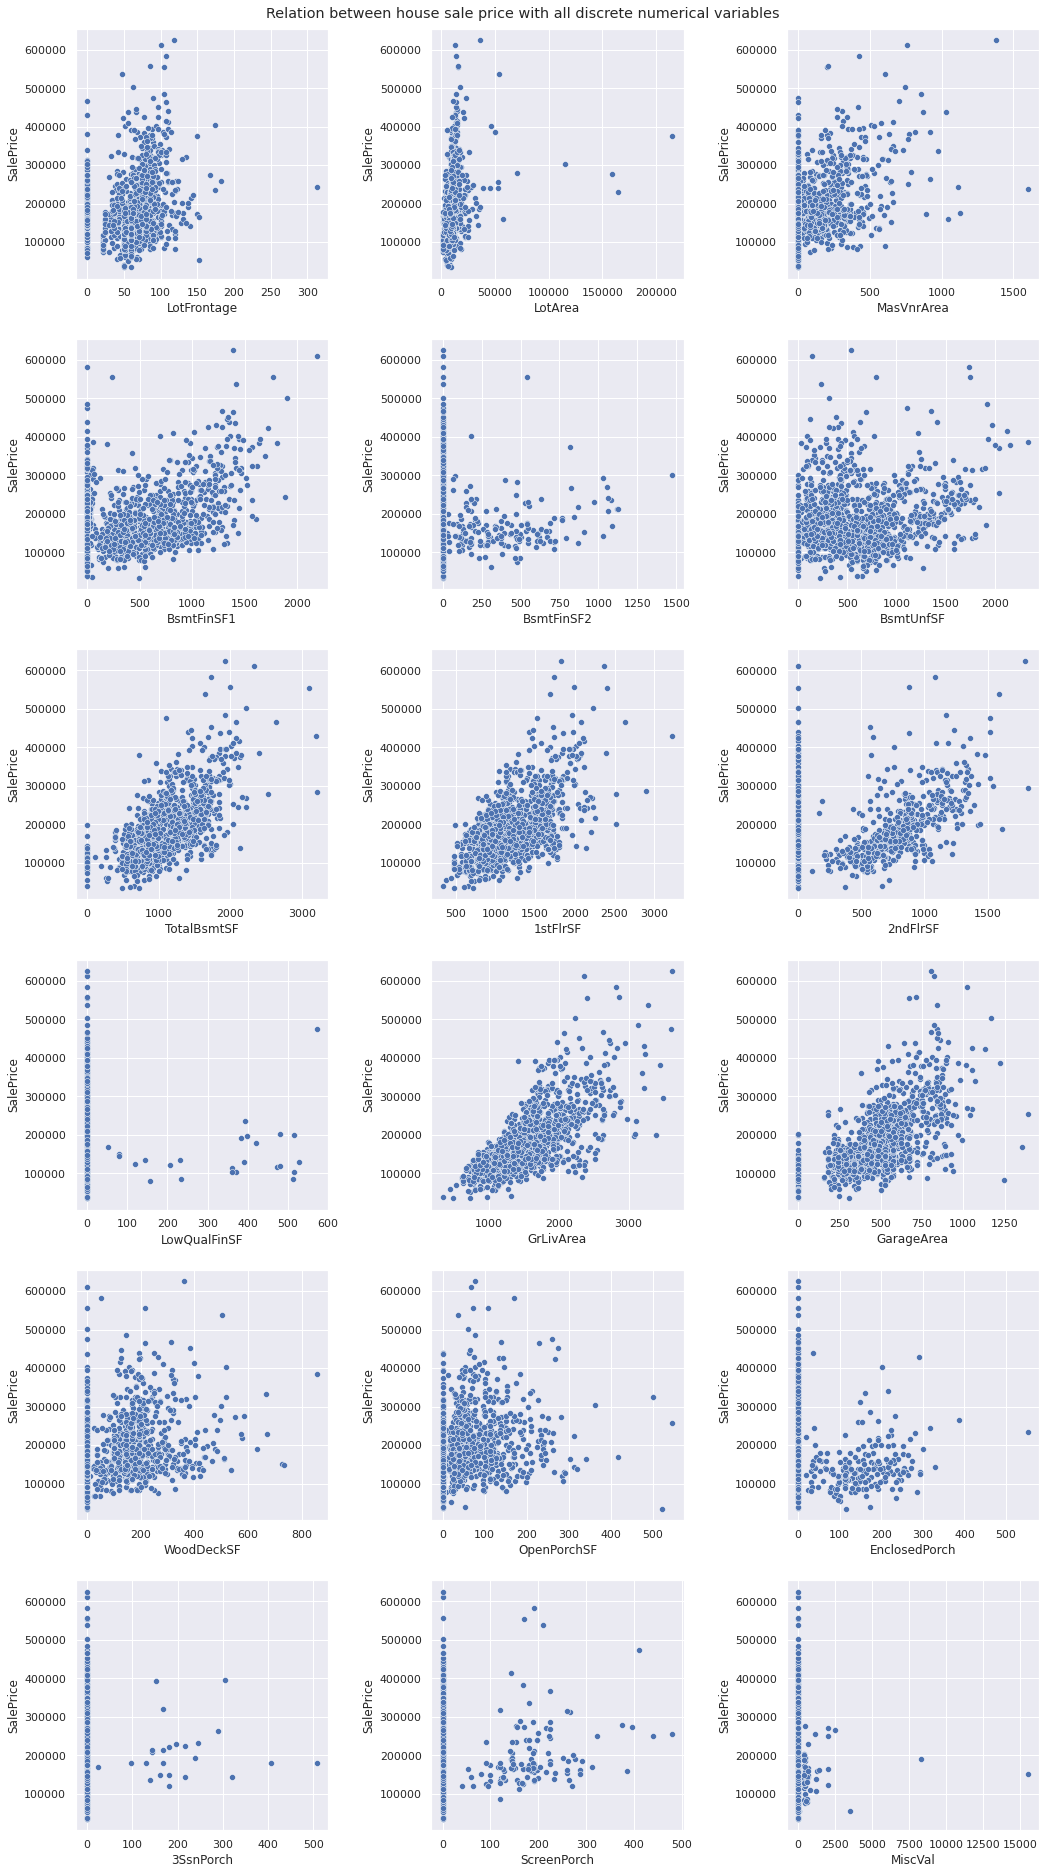

In [ ]:
cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
        'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']
fig = plt.figure(figsize=(15,30))
for c,i in zip(cols, range(1,20)):
    ax = fig.add_subplot(7,3,i)
    sns.scatterplot(x=c,y='SalePrice',data=df)
fig.suptitle('Relation between house sale price with all discrete numerical variables', y=0.999)
fig.tight_layout(pad=2.0)


### **Remarks**:

1. Properties with larger total basement area are more expensive than the smaller ones.
1. Properties with larger first floor area tend to have higher sale price, also quite true for second floor area.
1. Clearly, above ground living area reflects the sale price of the properties (larger area means higher price).
1. Properties with larger garage area are more expensive than the smaller ones.
1. It seems that properties with large wood deck and open porch area tend to have higher sale price.

### **EDA 17**
#### **Relation between several variables**

<pre>
We will try to find relation between several features (mostly numeric) by using correlation heatmap. Here, 
Spearman correlation coefficients are calculated for every pair of numerical, categorical (ordinal) features.
</pre>

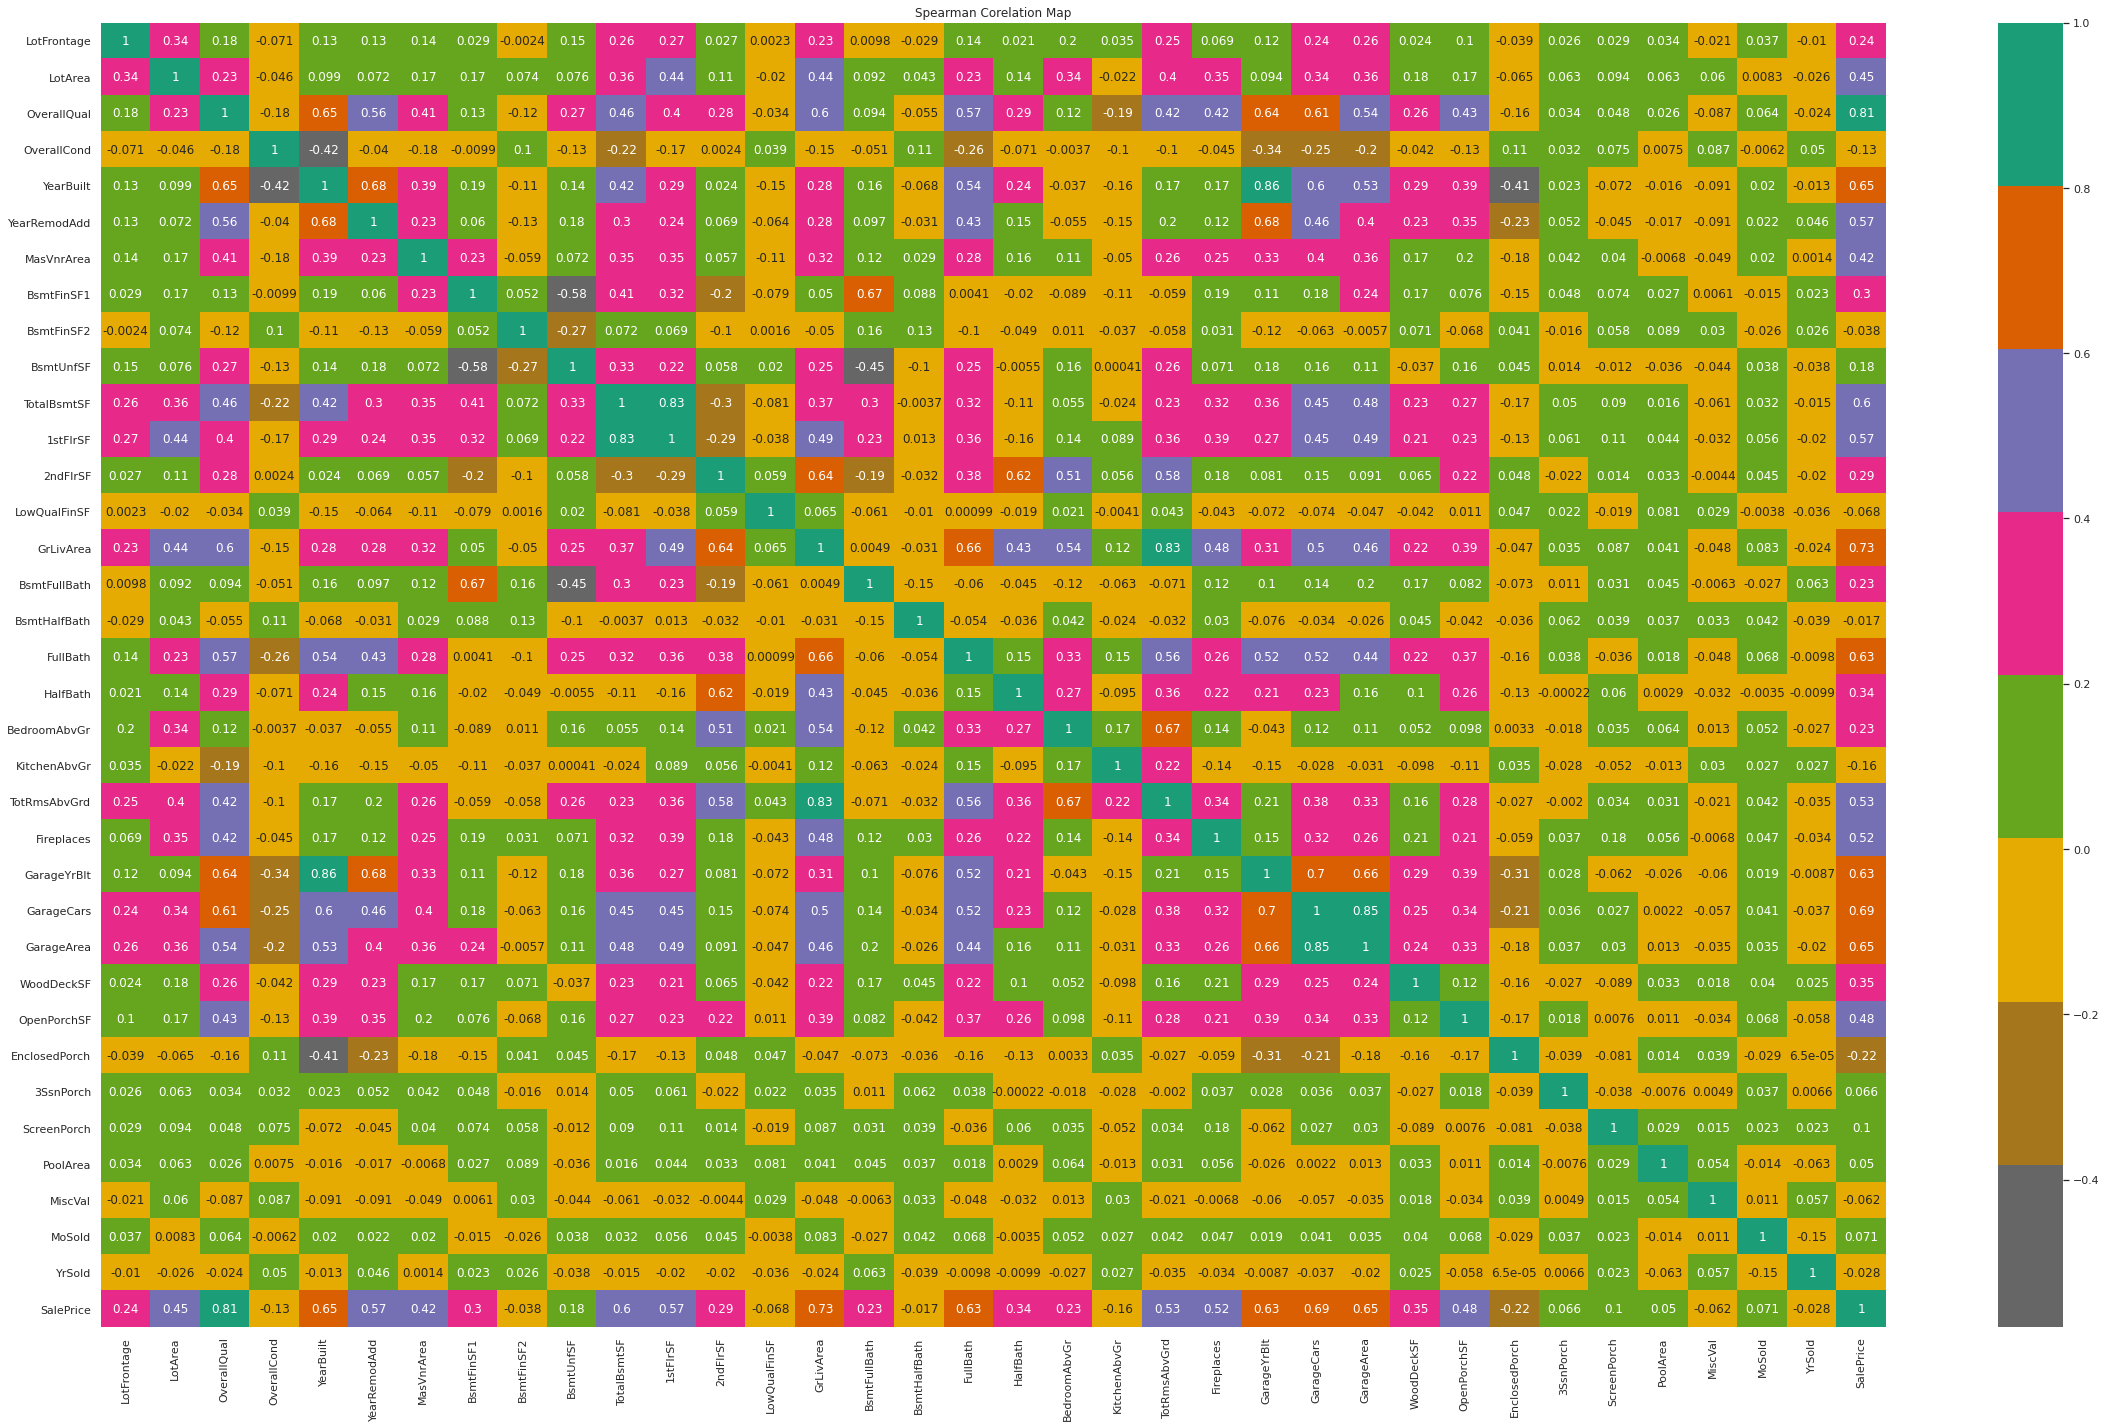

In [ ]:
plt.rcParams['figure.figsize'] = [40, 24]
plt.title('Spearman Corelation Map')
sns.heatmap(df.drop(columns=['Id','MSSubClass']).corr(method='spearman'),annot=True,cmap='Dark2_r')

### **Some features have high correlation with other features:**
GarageArea and GarageCars → clearly, larger garage will have more car capacity.
GrLivArea and TotRmsAbvGrd → clearly, larger living area tend to have more rooms.
GarageYrBlt and YearBuilt → it is likely that the house and its garage were built in the same year.
TotalBsmtSF and 1stFlrSF → house with large first floor area tend to have large basement area.
SalePrice has high correlation (>0.7) with OverallQual and GrLivArea → very important factors!

# **2nd Contribution**

## Tasks
* Utilize the notebook completed in `initial_contribution`
  - Append new work to the bottom of it. 
* Train a regression model predicting `SalePrice` for the other fields in `dataset.csv`
  - A simple model is fine here. We are concerned with the reasoning as to your model choice, not on how well it performs. 
* **Primary Task** - Answer the following questions:  
   - Why did you use the regression model technique you chose? 
   - Why did you choose the predictors/covariates/variables you used?
   - How well does your model perform? Please explain your reasoning and include work regarding model validation. 
     - Do you believe the model overfits or underfits the data?
     - Is there a subset of the data that the model performs better on?

In [ ]:
# for the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

# for feature engineering
from sklearn.preprocessing import StandardScaler
from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc
from feature_engine import encoding as ce

#### **1. `Primary Task`**

Lasso regressonal model is my choice of model for the following reasons:

1. It's one of the best option for the size of dataset  we are woring on and based on the Expository data analysis we perform on the dataset.
2. Lasso as a linear model is easy to implement unlike the higher non-linear models that so many of it's parameter need to be tuned. lasso because of it's linearity assumes a linear relationship between the target variables and the independent. 
3. It would help us to reduce the magnitude of regression coefficients hereby preventing our models from overfitting on the training data.

In [ ]:
# find categorical variables
categorical_ = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables'.format(len(categorical_)))

There are 43 categorical variables


In [ ]:
# make a list of the numerical variables first
numerical_= [var for var in df.columns if df[var].dtype!='O']

# list of variables that contain year information
year_vars = [var for var in numerical_ if 'Yr' in var or 'Year' in var]

In [ ]:
# Find discrete variables
# To identify discrete variables, I will select from all the numerical ones, those that contain a finite and small number of distinct values. See below.

discrete_ = []
for var in numerical_:
    if len(df[var].unique())<20 and var not in year_vars:
        # print(var, ' values: ', df[var].unique())
        discrete_.append(var)
print()
print('There are {} discrete variables'.format(len(discrete_)))



There are 14 discrete variables


In [ ]:
# Find continuous variables
# We skip the Id variable and the target variable SalePrice, which are both also numerical

numerical_ = [var for var in numerical_ if var not in discrete_ and var not in ['Id', 'SalePrice'] and var not in year_vars]
print('There are {} numerical and continuous variables'.format(len(numerical_)))

There are 18 numerical and continuous variables


In [ ]:
# Encode the categorical data using sklearn's LabelEncode
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
d = defaultdict(LabelEncoder)
df[categorical_] = df[categorical_].apply(lambda x: d[x.name].fit_transform(x))

In [ ]:
#  Perform a test split on the df; df has all the complete features without 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['SalePrice','Id'], axis=1), df['SalePrice'], test_size=0.2, random_state=0)
print('Shapes')
print('X_train:', X_train.shape)
print('X_val:', X_test.shape)
print('y_train:', y_train.shape)
print('y_val:', y_test.shape)

Shapes
X_train: (1164, 79)
X_val: (292, 79)
y_train: (1164,)
y_val: (292,)


####  **2.`Primary Task`**
I chose the variables/covariates for our model from the insight we got after performing Exploratry Data Anayisis on the dataset, we discovered that most of the variables (the numerical ones) have strong correlation with the target variable `SalePrice` (OverallQual and SalePrice) while some have weak relationship, others still have strong relationship between themselves (GarageYrBlt and YearBuilt). In order not to generalize, they performed enought data cleaning on the dataset and then passed it to the Lasso regressional model to train on. 

In [ ]:
# function to calculate elapsed time

def elapsed_years(df, var):
    # capture difference between year variable and year the house was sold
    df[var] = df['YrSold'] - df[var]
    return df

In [ ]:
# function to calculate elapsed time

def elapsed_years(df, var):
    # capture difference between year variable and year the house was sold
    df[var] = df['YrSold'] - df[var]
    return df

In [ ]:
#  perform standarization on the numerical values.
stdsc = StandardScaler()
X_train.loc[:,numerical_] = stdsc.fit_transform(X_train[numerical_])
X_test.loc[:,numerical_] = stdsc.transform(X_test[numerical_])

In [ ]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)

In [ ]:
X_train[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
1403,0,0,0.0
1312,17,17,17.0
680,30,30,30.0
639,0,0,0.0
247,52,52,52.0


Instead of the "year", now we have the amount of years passed since the house was built or remodeled and the house was sold. Next, we drop the YrSold variable from the datasets, because we already extracted its value.

In [ ]:
X_train.drop('YrSold', axis=1, inplace=True)
X_test.drop('YrSold', axis=1, inplace=True)

In [ ]:
lasso_pipeline = [

    # # discretisation + encoding
    ('discretisation', dsc.EqualFrequencyDiscretiser(
        q=5, return_object=True, variables=numerical_)),

    ('encoding', ce.OrdinalEncoder(
        encoding_method='ordered', variables=numerical_)),

    # # feature Scaling
    # ('scaler', StandardScaler()),
    
    # regression
    ('lasso', Lasso())
]

In [ ]:
lasso_pipe  = Pipeline(steps = lasso_pipeline)
# let's fit the pipeline
lasso_pipe.fit(X_train, y_train)
# r2 = lasso_pipe.score(X_test, y_test)

# let's get the predictions
y_pred = lasso_pipe.predict(X_test)
X_train_preds = lasso_pipe.predict(X_train)
score = cross_val_score(lasso_pipe, X_train, y_train, cv=5, scoring='r2')


print(f'Train score of trained model: {lasso_pipe.score(X_train, y_train)*100:.3f}')

print(f'Test score of trained model R\u00b2 : {r2_score(y_test, y_pred)*100:.3f}')

# print(f'R2 score / Test score of trained model R\u00b2 : {lasso_pipe.score(X_test, y_test)*100:.3f}')

print(f'Cross_validation(mean) R\u00b2 score for Lasso regression: {score.mean()*100:.3f}')

# print(f'Cross_validation(standard devation) R\u00b2 score for Lasso regression: {score.std()*100:.3f}')

Train score of trained model: 86.576
Test score of trained model R² : 86.847
Cross_validation(mean) R² score for Lasso regression: 82.962


#### **3. `Primary Task`**
#### The model could account for `~87%` of the variability in the target variable, the closer to 100 the better the performance. The model performance was evaluated using R<sup>2</sup> which is a measure of how well a regression model captured the variance in the underlaying data, i.e how close the data are to the fitted regression line. The `cross validation score` of our model is `~83%` which is still okay, since it's within the performance of the model  during the train/test split.

#### **4. `Primary Task`**

The model is underfitting, it's performing well on the data it hasn't seen rather than the data it has seen.

LASSO dropped 7 of 78 features.


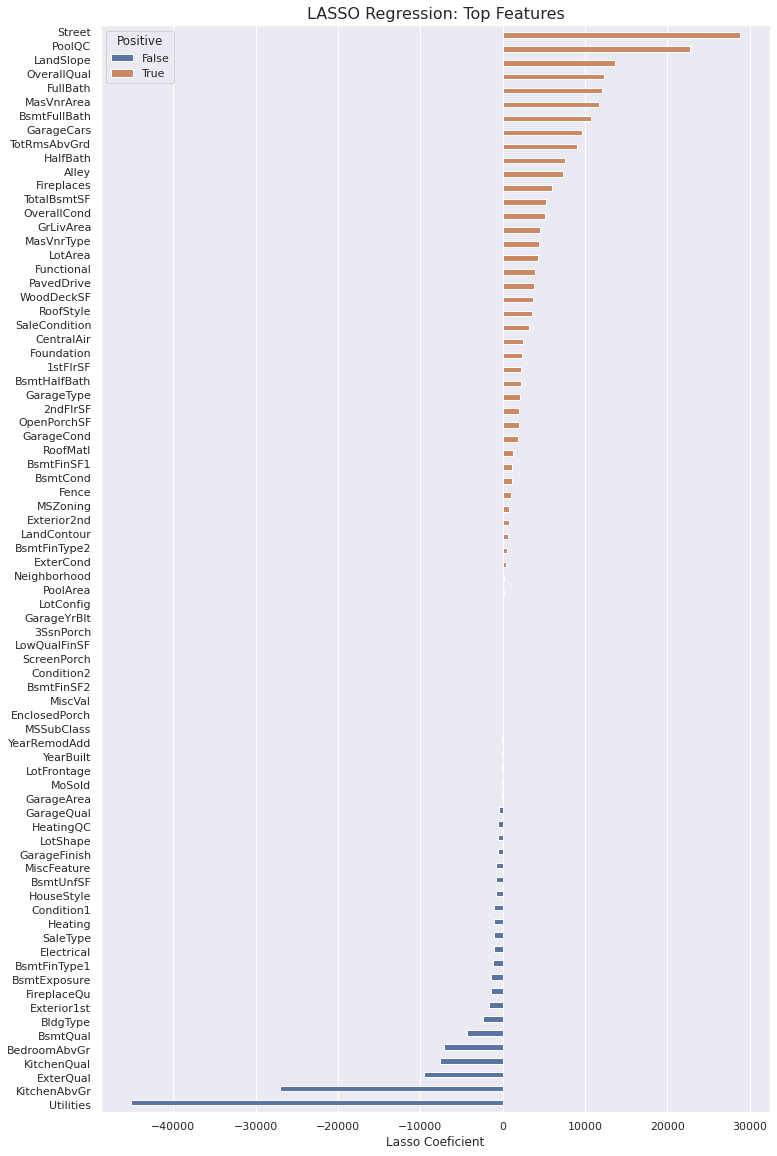

In [ ]:
# Let's take a look at what the LASSO regression made of our features.
coefs = pd.DataFrame({'coefs':lasso_pipe.named_steps['lasso'].coef_,'Positive':lasso_pipe.named_steps['lasso'].coef_ >0 }, 
index=X_train.columns)
coefs['coefs_abs'] = coefs.coefs
# coefs['coefs_abs'] = np.abs(coefs.coefs)
print('LASSO dropped {} of {} features.'.format(sum(coefs.coefs == 0), coefs.shape[0]))
top_coefs = coefs.sort_values(by='coefs_abs', ascending=False)
plt.figure(figsize=(12,20))
sns.barplot( top_coefs.coefs_abs, top_coefs.index, hue=top_coefs.Positive)
plt.title('LASSO Regression: Top Features', fontsize=16)
plt.xlabel('Lasso Coeficient')
plt.show() 

### **5. `Primary Task`**
#### The above barplot displays the top features of the model during the train/test split. it performed better in the test set (data unseen) than on the train (data seen).